# Importación de librerias

In [1]:
# Procesamiento de datos
import numpy as np
import pandas as pd
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prp
transform = prp.MinMaxScaler()
import sklearn
sklearn.metrics.matthews_corrcoef

# Graficadores
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Lectura del dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('covid_limpio.csv')
# df = pd.read_csv('/content/drive/Othercomputers/Notebooks lab/Notebooks/PSY Covid/covid_limpio.csv')
df_label = None
df_label = pd.DataFrame(df.iloc[:,0:14])
df.head(5)

Life_Change_1  Life_Change_2  Life_Change_3  Life_Change_4  Life_Change_5  \
0           -2.0            0.0            0.0            0.0            0.0   
1            2.0            2.0            2.0            2.0            2.0   
2           -1.0            0.0            2.0            0.0            1.0   
3            2.0            0.0            2.0            2.0            1.0   
4            0.0           -1.0            2.0            0.0            0.0   

   Life_Change_6  Life_Change_7  Life_Change_8  Life_Change_9  Growth_1  ...  \
0            2.0            0.0            1.0            1.0       3.0  ...   
1            2.0            2.0            2.0            2.0       3.0  ...   
2           -1.0           -1.0           -1.0            1.0       1.0  ...   
3            2.0            0.0            0.0            1.0       1.0  ...   
4            2.0            2.0            1.0            1.0       1.0  ...   

   Cluster_4  Cluster_5  Country  Education  Income  Gender   Age  Covid_Self  \
0        0.0        0.0    147.0        3.0     1.0     2.0  38.0         2.0   
1        0.0        0.0    147.0        3.0     2.0     3.0  28.0         3.0   
2        0.0        0.0    147.0        2.0     1.0     1.0  42.0         0.0   
3        0.0        0.0    147.0        3.0     1.0     1.0  43.0         0.0   
4        0.0        0.0    147.0        3.0     1.0     1.0  39.0         0.0   

   Stay_Home  Form_Channel  
0        1.0           2.0  
1        2.0           3.0  
2        0.0           2.0  
3        0.0           2.0  
4        1.0          10.0  

[5 rows x 123 columns]

Para la determinación del score de resilencia, cuyo objetivo es cuantizar la medida de crecimiento pos-traumatico de las personas, se obtiene la media geómetrica de las herramientas life_change y growth, debido a que estas tienen el sustento de ser las adecuadas para capturar la autopercepcion de un individuo.

In [4]:
df_label['score_LC'] = df_label.iloc[:,0:9].sum(axis=1) / 18
df_label['score_G'] = df_label.iloc[:,9:14].sum(axis=1) / 15

In [5]:
df_label.describe()

Life_Change_1  Life_Change_2  Life_Change_3  Life_Change_4  \
count   82776.000000   82776.000000   82776.000000   82776.000000   
mean       -0.463637      -0.462103       0.064753      -0.625036   
std         1.216550       1.052687       1.058614       0.942489   
min        -2.000000      -2.000000      -2.000000      -2.000000   
25%        -1.000000      -1.000000      -1.000000      -1.000000   
50%        -1.000000      -1.000000       0.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         2.000000       2.000000       2.000000       2.000000   

       Life_Change_5  Life_Change_6  Life_Change_7  Life_Change_8  \
count   82776.000000   82776.000000   82776.000000   82776.000000   
mean       -0.704637       0.127187       0.034551      -0.173601   
std         1.014898       1.071872       0.763808       0.918348   
min        -2.000000      -2.000000      -2.000000      -2.000000   
25%        -2.000000      -1.000000       0.000000      -1.000000   
50%        -1.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         2.000000       2.000000       2.000000       2.000000   

       Life_Change_9      Growth_1      Growth_2      Growth_3      Growth_4  \
count   82776.000000  82776.000000  82776.000000  82776.000000  82776.000000   
mean        0.517626      1.432106      1.539408      1.746605      1.516164   
std         1.040458      0.829423      0.844757      0.880652      0.994423   
min        -2.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      1.000000      1.000000      1.000000      1.000000   
50%         1.000000      1.000000      2.000000      2.000000      2.000000   
75%         1.000000      2.000000      2.000000      2.000000      2.000000   
max         2.000000      3.000000      3.000000      3.000000      3.000000   

           Growth_5      score_LC       score_G  
count  82776.000000  82776.000000  82776.000000  
mean       2.020151     -0.093605      0.550296  
std        0.908634      0.278693      0.226348  
min        0.000000     -1.000000      0.000000  
25%        2.000000     -0.277778      0.400000  
50%        2.000000     -0.111111      0.600000  
75%        3.000000      0.055556      0.666667  
max        3.000000      1.000000      1.000000

# Analisis espectral con KDE

Debido a la naturaleza discreta de los scores LC y G, se propone la siguiente metodologia de analísis:
1. Obtener de las scores de las herramientas "cambios conductuales" y "crecimiento".
2. Realizar un estudio espectral de densidad (KDE) mitigando la generación de valores con el fin de suavizar los efectos de la transformación a valores continuos. Esto mediante una modificación del valor de ancho de banda con el fin de conservar la distribución original.
3. Determinar el punto de equilibrio mediante un estudio de supervivencia a los resultados obtenidos en el punto anterior. La justificación de este paso proviene de la naturaleza discreta de las herramientas, ademas de que, el tamaño de los diccionarios es diferente. El score_LC lo componen 37 elementos, mientras que a score_G solo 16, es por esto que una comparación directa no es posible.

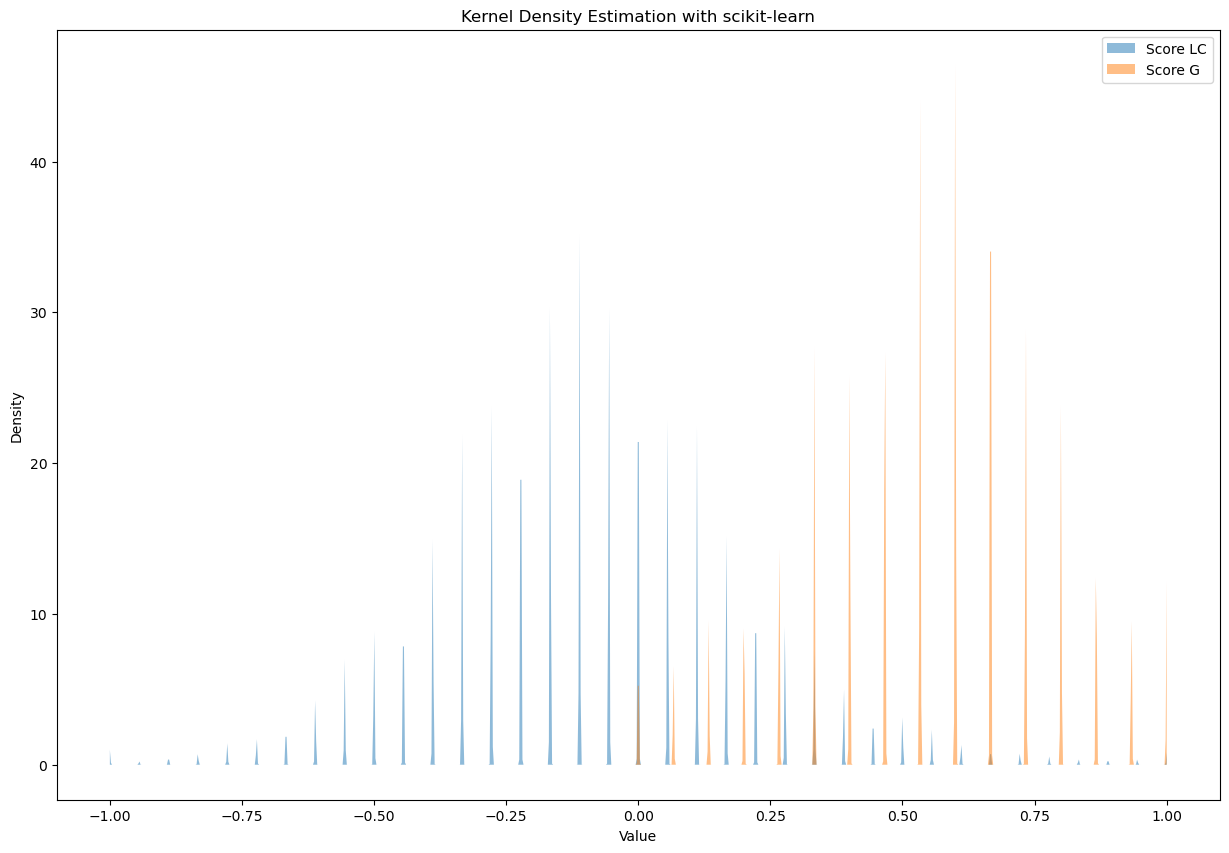

In [6]:
from sklearn.neighbors import KernelDensity

plt.figure(figsize=(15,10))
# Ajustar el modelo KernelDensity para 'score_LC'
X_LC = df_label['score_LC'].values[:, np.newaxis]
kde_LC = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(X_LC)

# Ajustar el modelo KernelDensity para 'score_G'
X_G = df_label['score_G'].values[:, np.newaxis]
kde_G = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(X_G)

# Crear un espacio de puntos donde evaluar las densidades
X_plot = np.linspace(min(df_label['score_LC'].min(), df_label['score_G'].min()),
                     max(df_label['score_LC'].max(), df_label['score_G'].max()), 1000)[:, np.newaxis]

# Evaluar las densidades en esos puntos
log_dens_LC = kde_LC.score_samples(X_plot)
log_dens_G = kde_G.score_samples(X_plot)

# Graficar las densidades
plt.fill_between(X_plot[:, 0], np.exp(log_dens_LC), alpha=0.5, label='Score LC')
plt.fill_between(X_plot[:, 0], np.exp(log_dens_G), alpha=0.5, label='Score G')

# Añadir título y etiquetas
plt.title('Kernel Density Estimation with scikit-learn')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Analisis de PMF (Probability Mass Function)

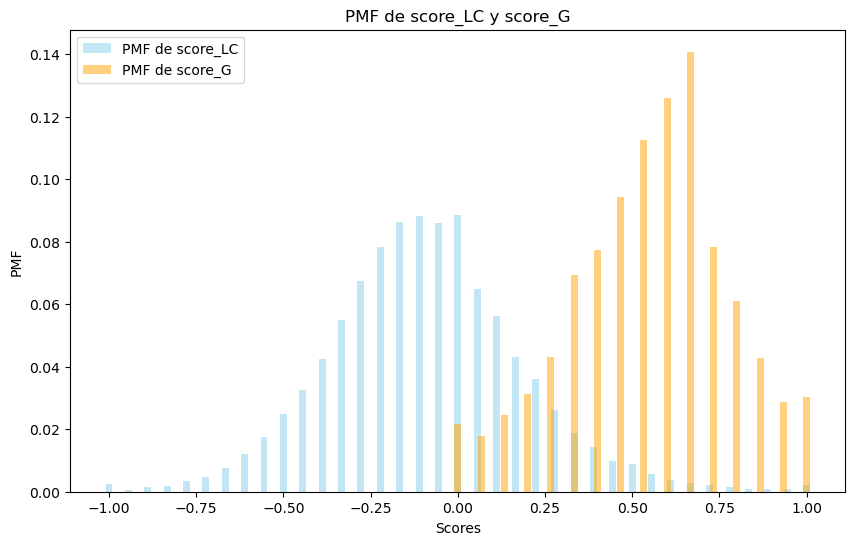

In [7]:
# Calcula las PMF de cada score
values_LC, counts_LC = np.unique(df_label['score_LC'], return_counts=True)
pmf_LC = counts_LC / counts_LC.sum()

values_G, counts_G = np.unique(df_label['score_G'], return_counts=True)
pmf_G = counts_G / counts_G.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_LC, pmf_LC, width=0.02, alpha=0.5, color='skyblue', label='PMF de score_LC')
plt.bar(values_G, pmf_G, width=0.02, alpha=0.5, color='orange', label='PMF de score_G')

# Descripciones de la gráfica
plt.title('PMF de score_LC y score_G')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

En contraste con el analísis de KDE y PMF ambas distribuciones se asemejan, lo cual respalda la metodologia propuesta

# Heatmaps de contingencia
Para visualizar la relación entre dos variables discretas, un heatmap de contingencia puede ser útil para mostrar la frecuencia conjunta de pares de valores.

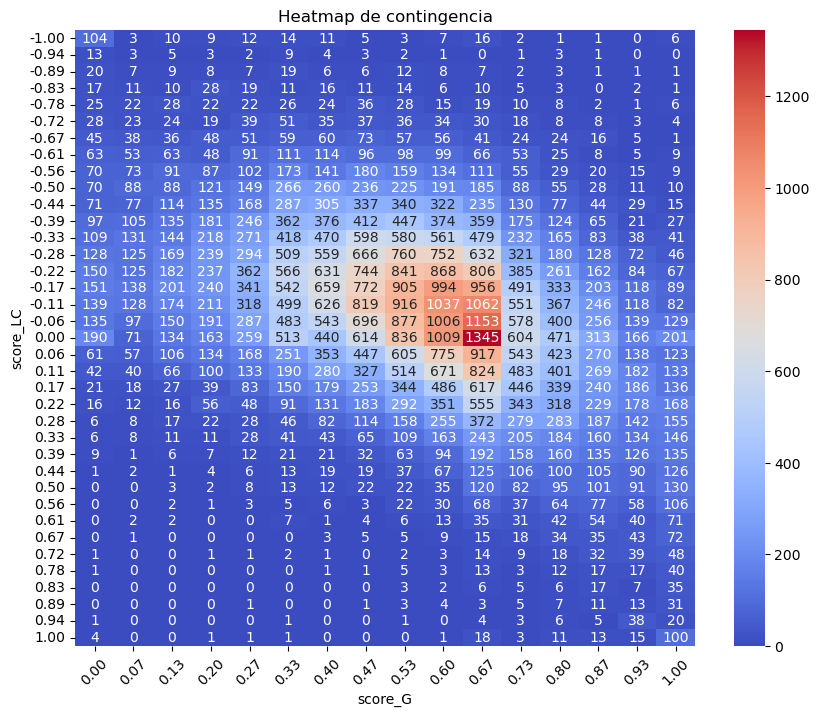

In [8]:
# Heatmap de contingencia
contingency_table = pd.crosstab(df_label['score_LC'], df_label['score_G'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt="d")

#  ticks con dos decimales
plt.xticks([i + 0.5 for i in range(len(contingency_table.columns))],
           ['{:.2f}'.format(val) for val in contingency_table.columns], rotation=45)
plt.yticks([i + 0.5 for i in range(len(contingency_table.index))],
           ['{:.2f}'.format(val) for val in contingency_table.index], rotation=0)

# Título y etiquetas
plt.title('Heatmap de contingencia')
plt.xlabel('score_G')
plt.ylabel('score_LC');

Valores bajos (cercanos a azul): Indican que muy pocos o ningún participante obtuvieron esa combinación particular de puntuaciones en score_LC y score_G. Implica que ciertas combinaciones de cambios conductuales y crecimiento post-traumático son muy raras o no se observan en absoluto, esto podría ser relevante para la interpretación psicológica o sociológica de los datos

chaGPT:

Si el heatmap de contingencia para las variables df_label['score_LC'] (cambios conductuales) y df_label['score_G'] (crecimiento post traumático) muestra valores bajos o ceros, en particular en áreas cercanas al color amarillo, aquí hay algunas interpretaciones psicológicas y sociológicas que podrían ser aplicables:

#### Interpretación Psicológica*:

1. *Poca o Ninguna Mejora Conductual y Crecimiento Post Traumático*: Los valores bajos podrían indicar que hay individuos que no han experimentado cambios significativos en su comportamiento ni han sentido un crecimiento post traumático notable durante la pandemia. Esto podría sugerir una falta de adaptación o una resistencia al cambio, posiblemente debido a un estado de shock o negación frente a la crisis.

1. *Resistencia al Cambio*: Algunos individuos pueden tener una alta resistencia al cambio o pueden haber mantenido rutinas rígidas como mecanismo de afrontamiento, resultando en mínimos cambios conductuales.

1. *Estabilidad en Tiempos de Crisis*: Para algunos, la estabilidad en su comportamiento y la ausencia de crecimiento post traumático pueden reflejar una forma de resiliencia que se manifiesta manteniendo una constancia en sus vidas a pesar de las circunstancias externas.

#### Interpretación Sociológica:

Influencia del Contexto Socioeconómico: Los valores bajos en áreas específicas pueden reflejar cómo el contexto socioeconómico influye en la capacidad de los individuos para experimentar crecimiento o cambios positivos durante tiempos difíciles. Por ejemplo, la falta de recursos puede limitar las oportunidades para mejorar o adaptar comportamientos.

1. *Impacto del Aislamiento Social*: La pandemia ha llevado a muchas personas a experimentar aislamiento social, lo que podría estar relacionado con pocos cambios en la conducta y el crecimiento personal, ya que las interacciones sociales limitadas pueden impedir el crecimiento post traumático.

1. *Desafíos del Confinamiento*: Para aquellos con condiciones de vivienda desafiantes o un entorno de confinamiento restrictivo, es posible que haya poca oportunidad para cambios positivos en el comportamiento o el crecimiento personal.

Es importante señalar que cualquier interpretación de los datos debe hacerse con cautela, considerando la complejidad de las experiencias humanas durante la pandemia. Además, las interpretaciones deben estar respaldadas por un análisis más profundo y, si es posible, por datos cualitativos que puedan proporcionar un contexto más rico para entender las experiencias individuales detrás de los números.

(1.0, -1.0)

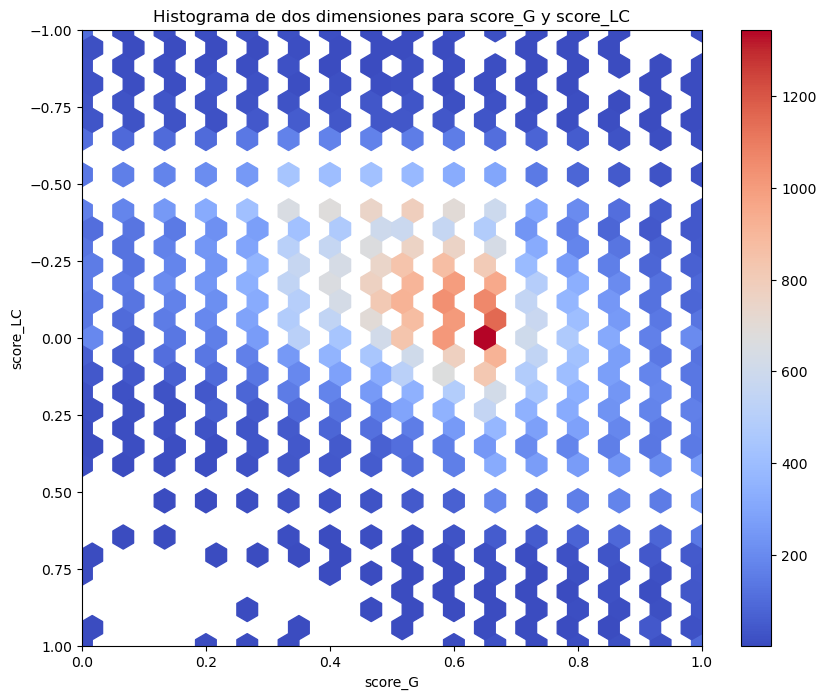

In [9]:
# Crear un histograma de dos dimensiones (también conocido como un hexbin plot o heatmap 2D)
# para las variables df_label['score_LC'] y df_label['score_G'].
plt.figure(figsize=(10, 8))
plt.hexbin(df_label['score_G'], df_label['score_LC'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar()

# Título y etiquetas
plt.title('Histograma de dos dimensiones para score_G y score_LC')
plt.xlabel('score_G')
plt.ylabel('score_LC')

# Ajustar los límites de los ejes para que coincidan con los rangos de las variables
plt.xlim(0, 1)
plt.ylim(1, -1)  # Límites invertidos para el eje Y


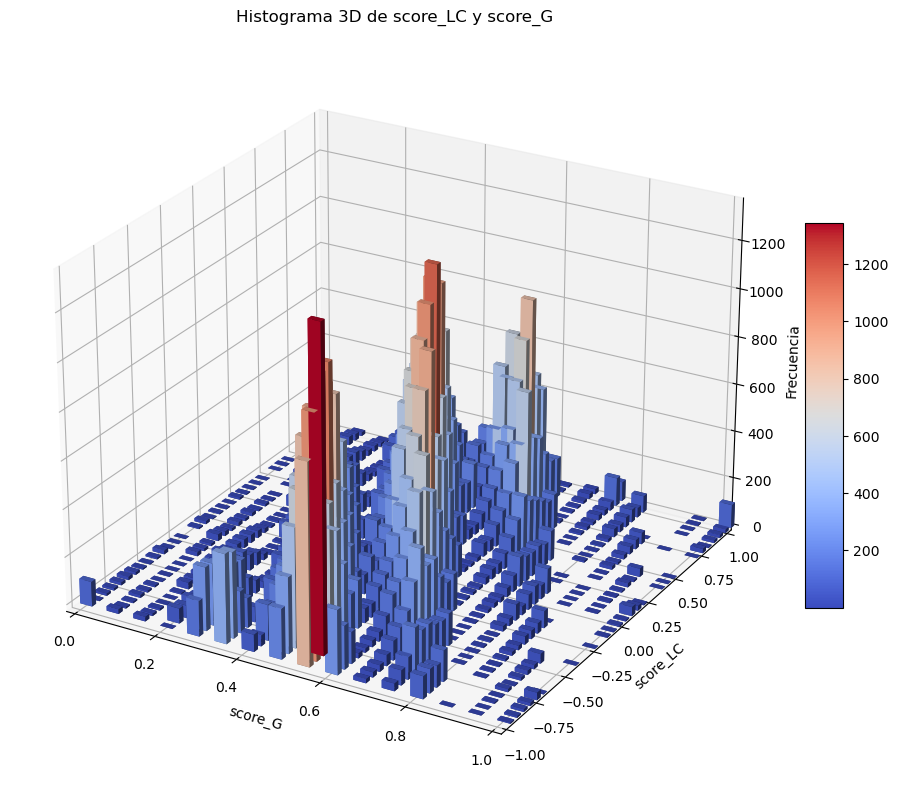

In [10]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
# Crear figura y eje para el gráfico 3D
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Coordenadas x, y para cada barra
xpos, ypos = np.meshgrid(contingency_table.columns, contingency_table.index, indexing="ij")

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Altura de las barras
dz = contingency_table.values.flatten()

# Filtrar para eliminar las barras con altura cero
non_zero_mask = dz != 0
xpos = xpos[non_zero_mask]
ypos = ypos[non_zero_mask]
zpos = zpos[non_zero_mask]
dz = dz[non_zero_mask]

# Ancho y profundidad de las barras
dx = dy = 0.03

# Colormap
colors = plt.cm.coolwarm(dz / np.max(dz))

# Crear barras solo si la frecuencia es mayor que cero
if np.any(dz > 0):
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

# Configurar barra de color
norm = Normalize(dz.min(), dz.max())
mappable = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
mappable.set_array(dz)
cbar = fig.colorbar(mappable, shrink=0.5, aspect=10, pad=0.02, ax=ax)

# Título y etiquetas
ax.set_title('Histograma 3D de score_LC y score_G')
ax.set_xlabel('score_G')
ax.set_ylabel('score_LC')
ax.set_zlabel('Frecuencia')

# Ajustar límites de ejes
ax.set_xlim([min(xpos), max(xpos)])
ax.set_ylim([min(ypos), max(ypos)])
ax.set_zlim([0, max(dz)])

ax.view_init(elev=25, azim=-60)

plt.show();

# Correlación de Spearman
El coeficiente de Spearman es una mejor medida (que el coeficiente de correlación de Pearson) ya que no asume una relación lineal y que estén distribuidos normalmente y puede manejar datos ordenados pero no necesariamente continuos.

In [11]:
spearman_correlation = df_label[['score_LC', 'score_G']].corr(method='spearman')
spearman_correlation

score_LC   score_G
score_LC  1.000000  0.380553
score_G   0.380553  1.000000

Un valor de 0.347746 indica una correlación positiva moderada entre las dos variables. Significa que a medida que los valores de una variable tienden a aumentar, los valores de la otra variable también tienden a aumentar en un patrón monótono, pero no necesariamente lineal.

# Determinacion del punto de equilibrio

In [12]:
dens_diff = np.exp(log_dens_LC) - np.exp(log_dens_G)

# Encontrar los índices donde la diferencia cambia de signo
sign_change_indices = np.where(np.diff(np.sign(dens_diff)))[0]

Dado que los datos presentan una naturaleza discreta, es necesario emplear herramientas analíticas apropiadas para la extraccion de informacion coherente. De esto surge la necesidad de una identificación precisa de un punto de equilibrio, el cual constituye un componente crítico para las etapas posteriores de la presente propuesta.

Para determinar la variable de interés se realizará la sustracción de las densidades correspondientes de cada característica dentro del conjunto de datos de cada conjunto de preguntas "cambios conductuales" y "crecimiento personal", este analisis fue realiazado previamente mediante un estudio de **KDE** (Kernel Density Estimation) y **PMF** (Probability Mass Function).

De esta manera con los resultados obtenidos previamente se procederá a ralizar una resta entre los valores de densidad de cada herramienta individual, de tal manera que, se almacenara en una lista el indice donde se presente un cambio de signo, lo cual se interpretará como un incremento en la densidad de score_G y una disminución en score_LC.

Los valores almacenados en la lista serán utilizados para el cálculo de una media geométrica. Este procedimiento pretende determinar el punto de equilibrio basándose en el conjunto de pares valor/densidad que reflejan un cambio significativo.

chatGPT:

Este enfoque para encontrar el punto de equilibrio promediando los valores del eje x donde ocurre un cambio de signo en la diferencia de densidades es válido y puede ser una forma efectiva de manejar la naturaleza discreta de los datos. Este método puede proporcionar un resultado que refleje mejor la transición observada visualmente entre las dos distribuciones, especialmente cuando el cambio no ocurre en un único punto bien definido, sino más bien a lo largo de un intervalo.

Calcular el promedio de los valores del eje x en los índices donde la diferencia de densidad cambia de signo ayuda a suavizar el efecto de la discretización y puede dar una estimación más representativa del "punto de equilibrio" en presencia de variabilidad o ruido en los datos. Este método es particularmente útil cuando esperas que el punto de intersección esté entre dos valores medidos, en lugar de coincidir exactamente con un punto de datos.

In [13]:
eq_point = X_plot[sign_change_indices].mean()
eq_point

0.4808356743840615

Una vez determinado el punto de equilibrio lo siguiente es la obtencion del score de resilencia a partir de score_LC y score_G

In [14]:
df_label['score_resili'] = df_label['score_LC'] + df_label['score_G']

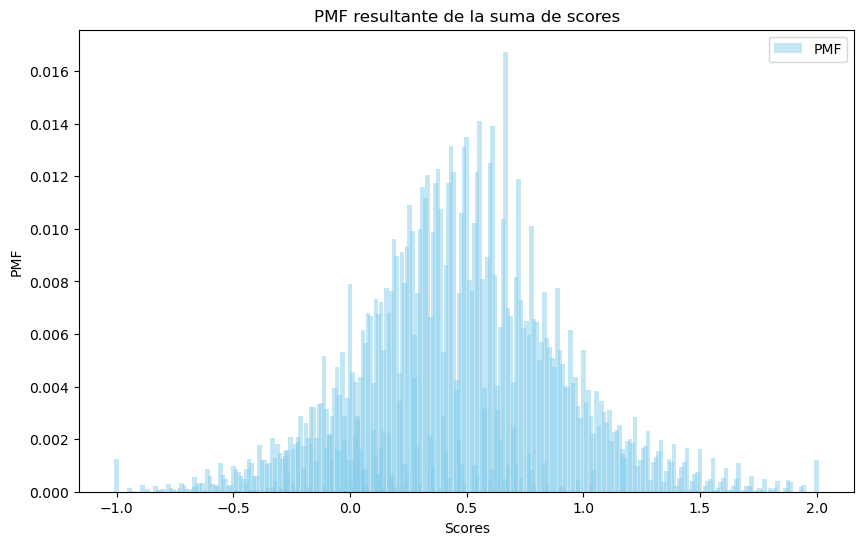

In [15]:
# Calcula las PMF de cada score
values_sum, counts_sum = np.unique(df_label['score_resili'], return_counts=True)
pmf_sum = counts_sum / counts_sum.sum()


# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_sum, pmf_sum, width=0.02, alpha=0.5, color='skyblue', label='PMF')

# Descripciones de la gráfica
plt.title('PMF resultante de la suma de scores')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

# Realizacion del etiquetado

In [16]:
df_label.iloc[:,14:].describe()

score_LC       score_G  score_resili
count  82776.000000  82776.000000  82776.000000
mean      -0.093605      0.550296      0.456690
std        0.278693      0.226348      0.423331
min       -1.000000      0.000000     -1.000000
25%       -0.277778      0.400000      0.177778
50%       -0.111111      0.600000      0.444444
75%        0.055556      0.666667      0.722222
max        1.000000      1.000000      2.000000

El etiquetado se basa en la discretización del score de resilencia. Se establecen rangos los cuales permiten dividir en tres clases las cuales tienen como objetivo establecer el tipo de crecimiento pos-traumatico:
* **Clase 0**: resilencia < 0. Aqui entran aquellas personas cuyo crecimiento fue negativo, es decir, carente de crecimiento personal y cambios conductuales negativos.

* **Clase 1**: 0 < resilencia <= 0.48. La implementacion de esta clase es necesaria pese a no ser una variable objetivo de gran importancia, recordando que el objetivo principal es la obtención de informacion de las clases negativa y positiva para asi ver las areas de oportunidad de crecimiento y de vulnerabilidad. Esta clase nace de la necesidad de ubicar a todos aquellos individuos que no experimentaron ningun tipo de crecimiento (abstinencia), o que en su defecto, la informacion proporcionada es ambigua debido al carente conocimiento del individuo sobre si mismo para poder determinar un nivel de cremienito.

* **Clase 2**: resilencia > 0.48. Crecimiento pos-tramatico positivo, donde el individuo tuvo cambios conductuales positivos y un crecimiento personal favorable.

In [17]:
df_label['Label'] = df_label['score_resili'].apply(lambda x: 0 if x < 0 else (1 if x <= eq_point else 2))
df['score_G'] = df_label['score_G']
df['score_LC'] = df_label['score_LC']
df['score_resili'] = df_label['score_resili']
df['label'] = df_label['Label']
df.iloc[:,123:].head()

score_G  score_LC  score_resili  label
0  0.933333  0.111111      1.044444      2
1  1.000000  1.000000      2.000000      2
2  0.733333  0.000000      0.733333      2
3  0.600000  0.555556      1.155556      2
4  0.800000  0.388889      1.188889      2

In [18]:
df['label'].value_counts()

label
2    38568
1    33641
0    10567
Name: count, dtype: int64

El resultado obtenido del etiquetado demuestra un dominio de la clase positiva, esto quiere decir que durante la pandemia existio una mayor cantidad de personas que experimentaron un cambio positivo. Asi mismo vemos que la clase minoritaria es la negativa. Esto se tomará en cuenta para estudios posteriores con el fin de evitar un desbalanceo de clases.

# Determinacion de la congruencia del etiquetado respecto al valor de los scores

In [19]:
# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [0,1,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10).index.tolist()
    selected_indices.extend(sampled_indices)

# Mostrar los índices de las observaciones seleccionadas
print(selected_indices)

[32015, 27192, 48654, 62221, 65546, 37224, 2917, 33893, 20911, 24699, 82457, 15830, 58344, 13603, 66307, 16313, 35185, 31538, 38828, 79305, 13950, 74747, 24160, 35370, 71424, 20706, 59891, 2386, 50122, 61249]


In [20]:
selected_data = df_label.loc[selected_indices]

# Mostrar el nuevo DataFrame
selected_data.iloc[:30, 0:]

Life_Change_1  Life_Change_2  Life_Change_3  Life_Change_4  \
32015           -2.0           -2.0           -2.0           -1.0   
27192           -1.0           -2.0           -1.0           -1.0   
48654           -1.0            0.0            0.0           -1.0   
62221           -2.0           -2.0           -2.0           -2.0   
65546           -2.0           -1.0            0.0            0.0   
37224           -1.0           -2.0            0.0           -2.0   
2917            -2.0           -1.0            0.0           -2.0   
33893           -2.0            0.0            0.0            0.0   
20911            0.0           -2.0            0.0           -2.0   
24699           -2.0            0.0            0.0            0.0   
82457           -1.0            2.0            1.0           -2.0   
15830            0.0           -1.0            1.0            0.0   
58344            2.0           -1.0            0.0           -2.0   
13603            1.0           -1.0            0.0           -1.0   
66307           -2.0           -1.0            0.0           -1.0   
16313           -1.0            0.0            0.0            0.0   
35185           -2.0           -1.0            1.0           -1.0   
31538            0.0            0.0            0.0           -1.0   
38828           -2.0           -2.0            1.0            0.0   
79305           -1.0           -1.0           -2.0            0.0   
13950           -1.0            0.0            1.0            0.0   
74747           -2.0           -2.0            0.0           -1.0   
24160            2.0           -1.0            0.0            1.0   
35370            1.0           -2.0            1.0           -2.0   
71424            0.0            0.0            1.0            0.0   
20706            2.0           -2.0            1.0            0.0   
59891           -1.0            0.0            0.0           -1.0   
2386            -1.0            0.0            0.0           -1.0   
50122           -1.0            0.0            0.0           -1.0   
61249            0.0            1.0            1.0           -1.0   

       Life_Change_5  Life_Change_6  Life_Change_7  Life_Change_8  \
32015           -2.0            1.0           -2.0           -2.0   
27192           -2.0            0.0            0.0           -1.0   
48654           -1.0            0.0           -1.0           -1.0   
62221           -2.0            0.0            0.0            0.0   
65546           -1.0           -1.0            0.0            0.0   
37224           -1.0           -2.0           -1.0           -1.0   
2917            -2.0           -2.0            0.0            0.0   
33893            0.0           -2.0            0.0           -2.0   
20911           -2.0            0.0           -1.0           -1.0   
24699           -1.0           -1.0            0.0           -1.0   
82457           -1.0            1.0            0.0           -1.0   
15830            0.0           -1.0            0.0           -1.0   
58344           -2.0            1.0            0.0           -2.0   
13603           -1.0            0.0            0.0            0.0   
66307            0.0            0.0            0.0            0.0   
16313           -2.0            0.0            0.0           -1.0   
35185           -2.0           -1.0            0.0            0.0   
31538           -2.0            0.0           -2.0           -2.0   
38828            0.0           -1.0            0.0            0.0   
79305           -1.0           -1.0            0.0            0.0   
13950            0.0            1.0            0.0            0.0   
74747           -1.0            1.0            0.0            0.0   
24160            1.0            0.0            0.0            1.0   
35370           -2.0            1.0            0.0            0.0   
71424            0.0            0.0            0.0            0.0   
20706            0.0           -1.0            0.0            1.0   
5989

# Analisis de las distribuciones de probabilidad

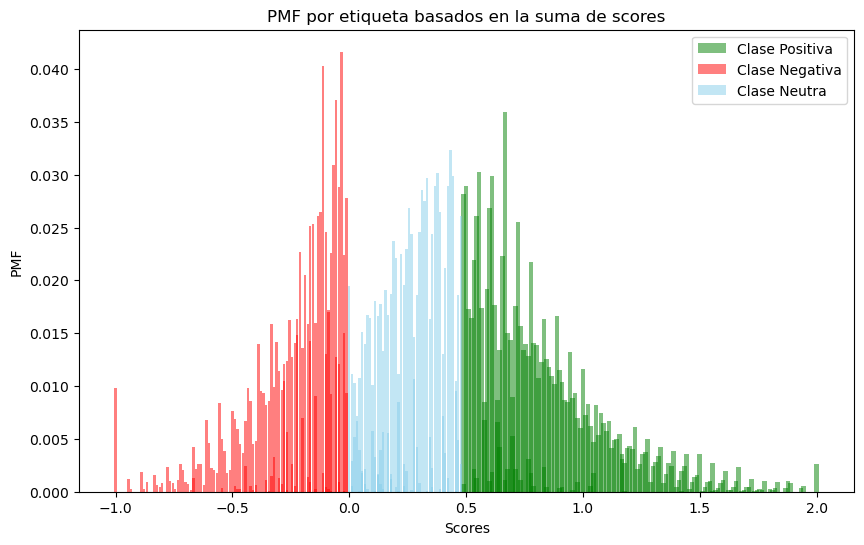

In [21]:
columns =  ['score_resili',]
# Calcula las PMF de cada score
labels_minus_one = df_label.loc[df_label['Label'] == 0, columns]
labels_plus_one = df_label.loc[df_label['Label'] == 2, columns]
labels_zero_one = df_label.loc[df_label['Label'] == 1, columns]

values_pos, counts_pos = np.unique( labels_plus_one, return_counts=True)
pmf_pos = counts_pos / counts_pos.sum()

values_neg, counts_neg = np.unique( labels_minus_one, return_counts=True)
pmf_neg = counts_neg / counts_neg.sum()

values_neu, counts_neu = np.unique( labels_zero_one, return_counts=True)
pmf_neu = counts_neu / counts_neu.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_pos, pmf_pos, width=0.02, alpha=0.5, color='green', label='Clase Positiva')
plt.bar(values_neg, pmf_neg, width=0.01, alpha=0.5, color='red', label='Clase Negativa')
plt.bar(values_neu, pmf_neu, width=0.01, alpha=0.5, color='skyblue', label='Clase Neutra')

# Descripciones de la gráfica
plt.title('PMF por etiqueta basados en la suma de scores')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

Para el presente estudio se propone separación de clases mediante establecimiento de tres etiquetas:

1. **Clase positiva**: Toda aquella cuyo valor de score fue mayor al punto de equilibrio. La funcion del punto de equilibrio es de alguna manera resumir y generalizar la informacion proveniente de los instrumentos "cambios conductuales" y "crecimiento personal", de esta manera podemos separar de forma eficiente con un unico valor a todos aquellos individuos cuya autopercepcion ante un evento traumatico fue positiva.
2. **Clase neutra**: Pese a no ser una de clases principales u objetos de interes es necesario considerar en esta clase a todas las observaciones no asociadas a un crecimiento ni positivo ni negativo. Si no que, la informacion o conocimiento del individuo sobre si mismo no fue suficiente para dar un resultado claro dentro de las dos clases de interes, si no uno ambiguo.
3. **Clase negativa**: Aqui se encuentran todas aquellas observaciones relacionadas a un score menor que cero, en otras palabras que su score de crecimiento fue menor al de cambios conductuales. Esta calse estan asociados los individuos los cuales tuvieron un crecimiento pos-traumatico negativo.

Dado a que los individuos de interes son aquellos que presentaron un crecimiento pos-traumatico positivo como negativo, los analisis posteriores seran enfocados a estas dos clases.

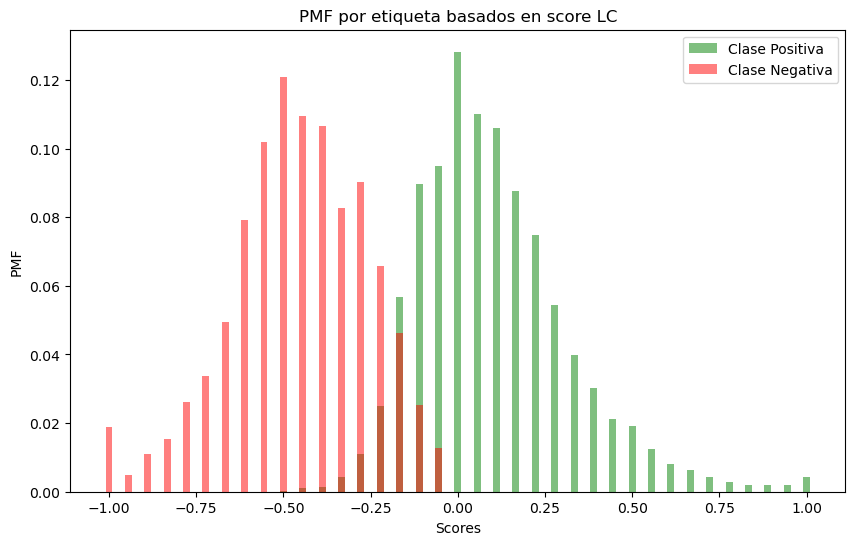

In [22]:
columns =  ['score_LC',]
# Calcula las PMF de cada score
labels_minus_one = df_label.loc[df_label['Label'] == 0, columns]
labels_plus_one = df_label.loc[df_label['Label'] == 2, columns]
labels_neu = df_label.loc[df_label['Label'] == 1, columns]

values_pos, counts_pos = np.unique( labels_plus_one, return_counts=True)
pmf_pos = counts_pos / counts_pos.sum()
values_neg, counts_neg = np.unique( labels_minus_one, return_counts=True)
pmf_neg = counts_neg / counts_neg.sum()
values_neu, counts_neu = np.unique( labels_neu, return_counts=True)
pmf_neu = counts_neu / counts_neu.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_pos, pmf_pos, width=0.02, alpha=0.5, color='green', label='Clase Positiva')
plt.bar(values_neg, pmf_neg, width=0.02, alpha=0.5, color='red', label='Clase Negativa')
# plt.bar(values_neu, pmf_neu, width=0.02, alpha=0.5, color='skyblue', label='Clase Neutra')

# Descripciones de la gráfica
plt.title('PMF por etiqueta basados en score LC')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

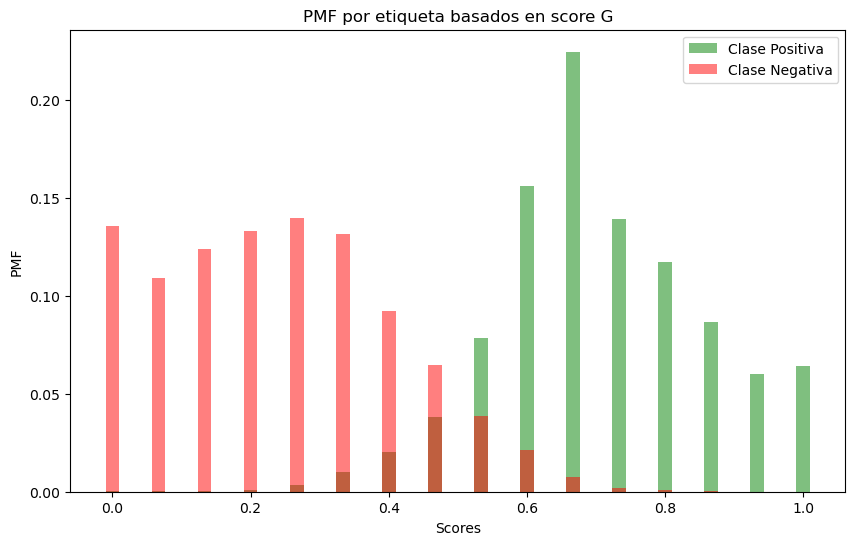

In [23]:
columns =  ['score_G',]
# Calcula las PMF de cada score
labels_minus_one = df_label.loc[df_label['Label'] == 0, columns]
labels_plus_one = df_label.loc[df_label['Label'] == 2, columns]
labels_neu = df_label.loc[df_label['Label'] == 1, columns]

values_pos, counts_pos = np.unique( labels_plus_one, return_counts=True)
pmf_pos = counts_pos / counts_pos.sum()
values_neg, counts_neg = np.unique( labels_minus_one, return_counts=True)
pmf_neg = counts_neg / counts_neg.sum()
values_neu, counts_neu = np.unique( labels_neu, return_counts=True)
pmf_neu = counts_neu / counts_neu.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_pos, pmf_pos, width=0.02, alpha=0.5, color='green', label='Clase Positiva')
plt.bar(values_neg, pmf_neg, width=0.02, alpha=0.5, color='red', label='Clase Negativa')
# plt.bar(values_neu, pmf_neu, width=0.02, alpha=0.5, color='skyblue', label='Clase Neutra')

# Descripciones de la gráfica
plt.title('PMF por etiqueta basados en score G')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend()

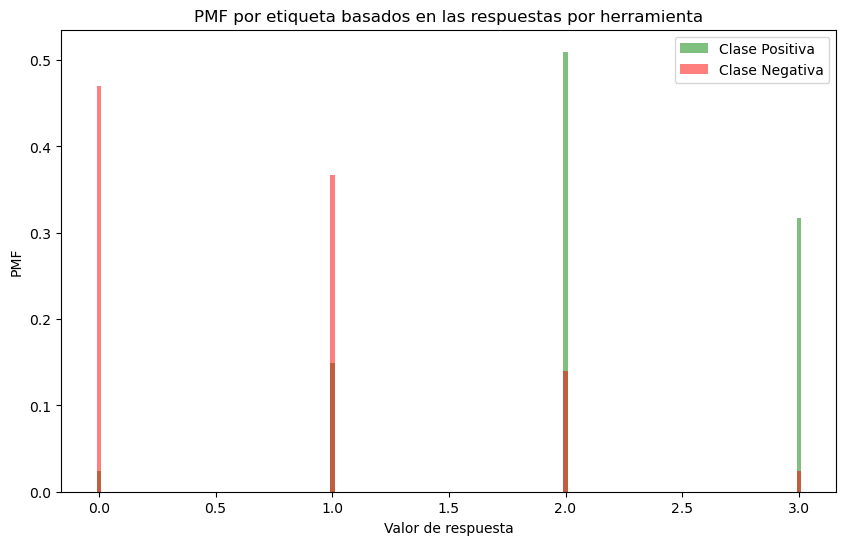

In [24]:
columns =  ['Growth_1', 'Growth_2', 'Growth_3', 'Growth_4',
       'Growth_5']
# Calcula las PMF de cada score
labels_minus_one = df_label.loc[df_label['Label'] == 0, columns]
labels_plus_one = df_label.loc[df_label['Label'] == 2, columns]

values_pos, counts_pos = np.unique( labels_plus_one, return_counts=True)
pmf_pos = counts_pos / counts_pos.sum()
values_neg, counts_neg = np.unique( labels_minus_one, return_counts=True)
pmf_neg = counts_neg / counts_neg.sum()
# values_neu, counts_neu = np.unique( df_label[df_label['Label'] == 0], return_counts=True)
# pmf_neu = counts_neu / counts_neu.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_pos, pmf_pos, width=0.02, alpha=0.5, color='green', label='Clase Positiva')
plt.bar(values_neg, pmf_neg, width=0.02, alpha=0.5, color='red', label='Clase Negativa')
# plt.bar(values_neu, pmf_neu, width=0.02, alpha=0.5, color='skyblue', label='Clase Neutra')

# Descripciones de la gráfica
plt.title('PMF por etiqueta basados en las respuestas por herramienta')
plt.xlabel('Valor de respuesta')
plt.ylabel('PMF')
plt.legend();

In [35]:
ceros = df_label['Label'] == 0
unos = df_label['Label'] == 2

In [36]:
# Medias y desviaciones estándar de las dos clases
media_clase0 = ceros.mean()
desviacion_clase0 = ceros.std()
media_clase1 = unos.mean()
desviacion_clase1 = unos.std()

In [51]:
from scipy.stats import norm
# Generar puntos de datos para visualizar las distribuciones
x = np.linspace(-5, 7, 1000)
pdf_clase0 = norm.logcdf(x, media_clase0, desviacion_clase0)
pdf_clase1 = norm.logcdf(x, media_clase1, desviacion_clase1)

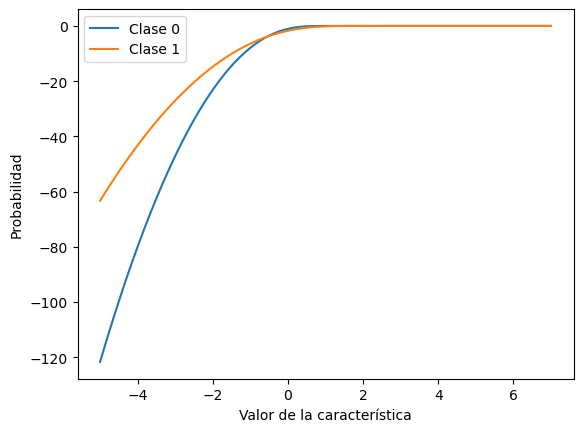

In [52]:
# Visualizar las distribuciones de las dos clases
plt.plot(x, pdf_clase0, label='Clase 0')
plt.plot(x, pdf_clase1, label='Clase 1')
plt.xlabel('Valor de la característica')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

In [50]:
# Calcular el error de Bayes
# Encontrar el punto de intersección de las dos distribuciones
x_interseccion = (media_clase0 + media_clase1) / 2
# Calcular el área bajo la curva de la clase 1 a la derecha del punto de intersección
error_clase0 = 1 - norm.logcdf(x_interseccion, media_clase0, desviacion_clase0)
# Calcular el área bajo la curva de la clase 2 a la izquierda del punto de intersección
error_clase1 = norm.logcdf(x_interseccion, media_clase1, desviacion_clase1)
# El error de Bayes es la suma de estos errores
error_bayes = error_clase0 + error_clase1
print(f'Error de Bayes: {error_bayes}')

Error de Bayes: 0.363851727115136


# Separabilidad de las features por etiqueta

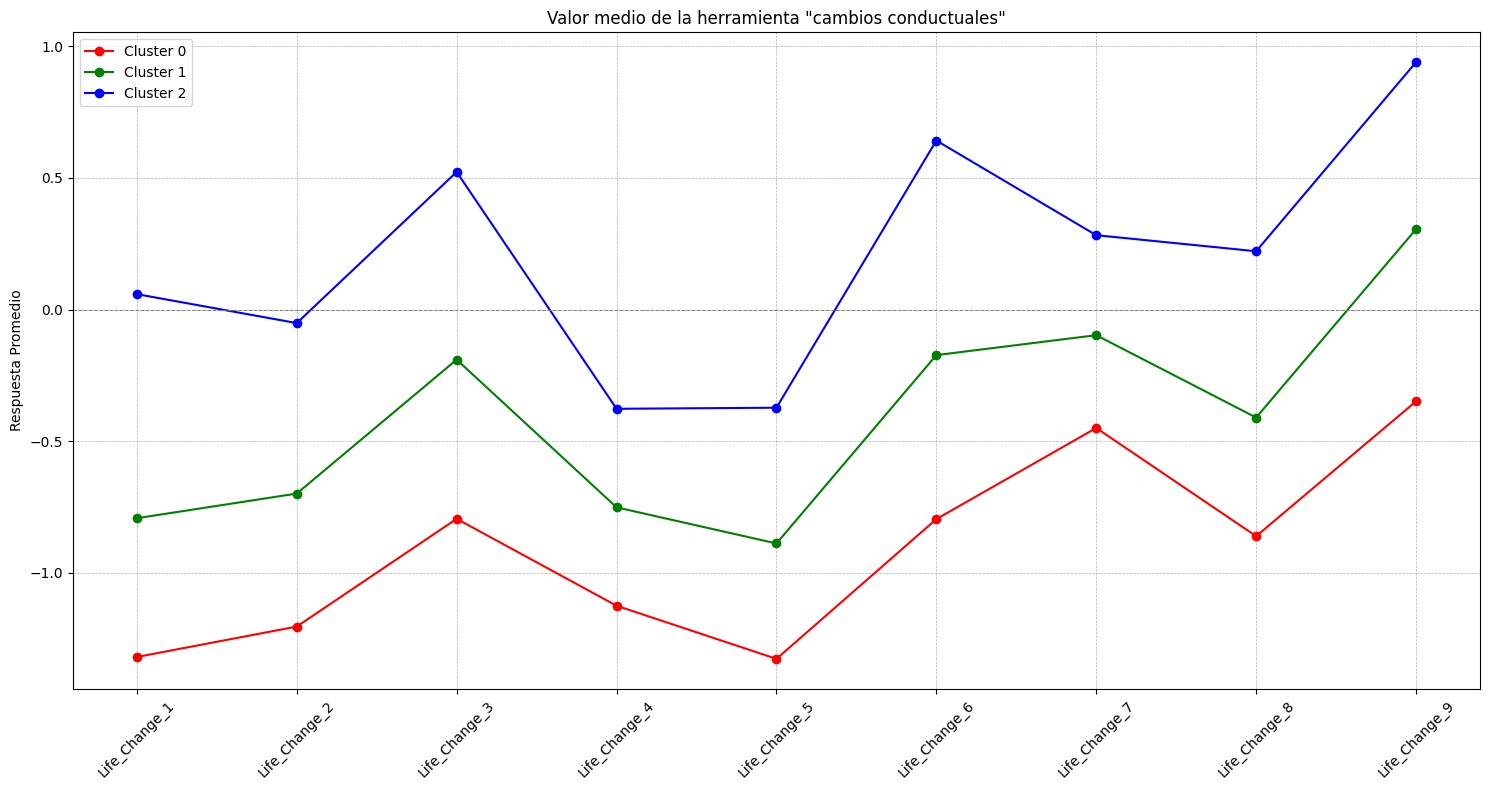

Life_Change_1  Life_Change_2  Life_Change_3  Life_Change_4  \
label                                                               
0          -1.320526      -1.204883      -0.795401      -1.125674   
1          -0.793110      -0.699444      -0.190393      -0.751821   
2           0.058520      -0.051571       0.522972      -0.377282   

       Life_Change_5  Life_Change_6  Life_Change_7  Life_Change_8  \
label                                                               
0          -1.327624      -0.796442      -0.450080      -0.861361   
1          -0.889064      -0.173211      -0.097500      -0.410541   
2          -0.373081       0.642268       0.282514       0.221505   

       Life_Change_9  
label                 
0          -0.348822  
1           0.305431  
2           0.940106

In [ ]:
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df.groupby('label')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4',
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8',
                                         'Life_Change_9']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Valor medio de la herramienta "cambios conductuales"')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

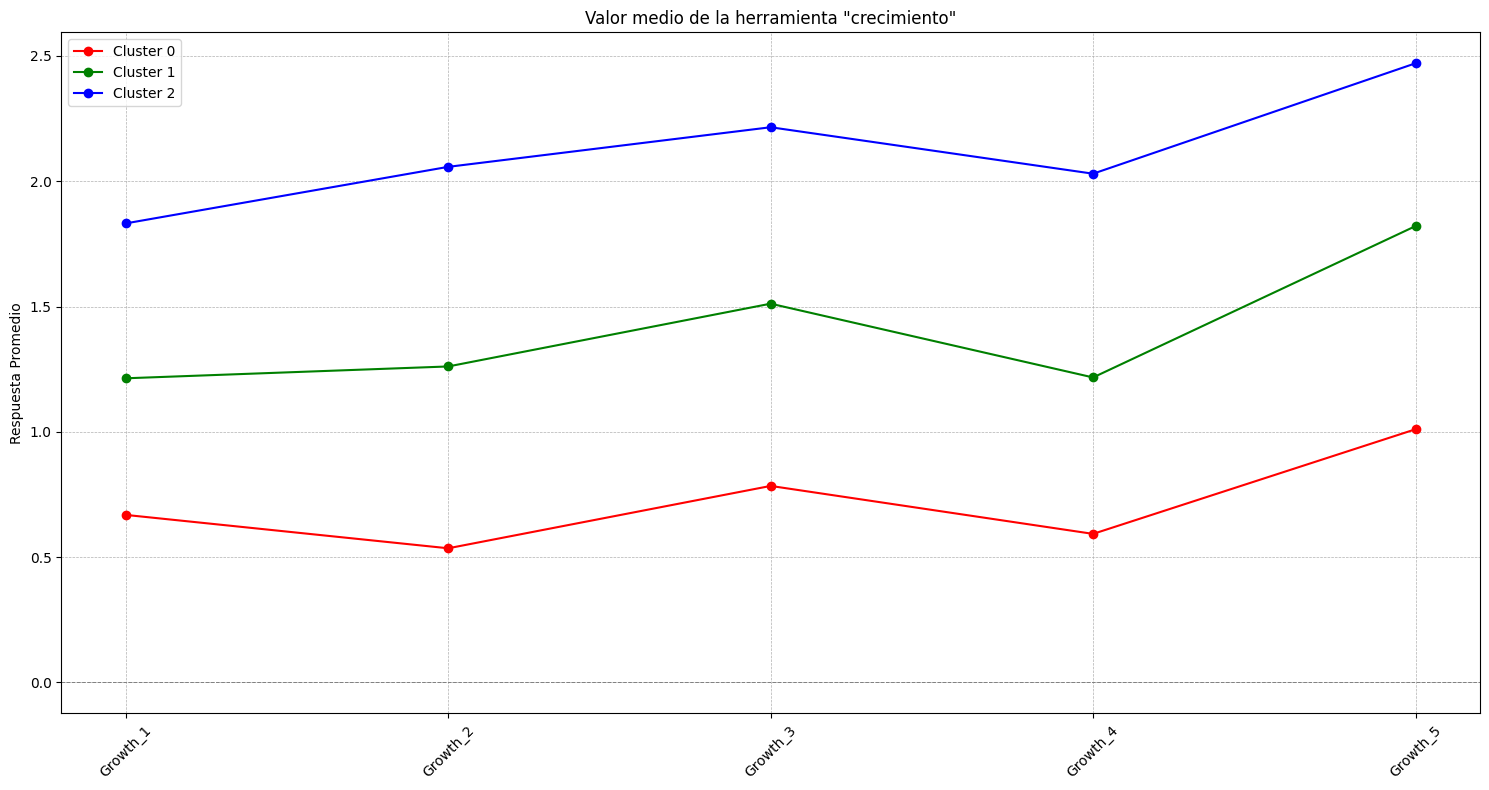

Growth_1  Growth_2  Growth_3  Growth_4  Growth_5
label                                                  
0      0.668591  0.535441  0.784234  0.592884  1.010315
1      1.213698  1.260932  1.511430  1.217057  1.820963
2      1.831804  2.057379  2.215412  2.030025  2.470571

In [ ]:
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df.groupby('label')[['Growth_1', 'Growth_2', 'Growth_3', 'Growth_4','Growth_5']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Valor medio de la herramienta "crecimiento"')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

# Obtencion de la media aritmetica de cada herramienta

In [ ]:
df_new = pd.DataFrame(df.iloc[:,14:17].mean(axis=1))
df_new = df_new.rename(columns={0:'adapt'})
df_new['prevent_exp'] = df.iloc[:,17:25].mean(axis=1)
df_new['prevent_reason'] = df.iloc[:,25:29].mean(axis=1)
df_new['follow_norms'] = df.iloc[:,29:30]
df_new['leaving_home'] = df.iloc[:,30:32].mean(axis=1)
df_new['people'] = df.iloc[:,32:33]
df_new['rooms'] = df.iloc[:,33:34]
df_new['amenit'] = df.iloc[:,34:38].mean(axis=1)
df_new['respons'] = df.iloc[:,38:41].mean(axis=1)
df_new['prevent_selfeffic'] = df.iloc[:,41:49].mean(axis=1)
df_new['prevent_outcome'] = df.iloc[:,49:57].mean(axis=1)
df_new['prevent_socialnorm'] = df.iloc[:,57:65].mean(axis=1)
df_new['adherence_factor'] = df.iloc[:,65:70].mean(axis=1)
df_new['trust'] = df.iloc[:,70:75].mean(axis=1)
df_new['info'] = df.iloc[:,75:76]
df_new['prevent_intention'] = df.iloc[:,76:84].mean(axis=1)
df_new['vulnerability_self'] = df.iloc[:,84:85]
df_new['vulnerability_others'] = df.iloc[:,85:86]
df_new['gravity_self'] = df.iloc[:,86:87]
df_new['gravity_others'] = df.iloc[:,87:88]
df_new['threat'] = df.iloc[:,88:92].mean(axis=1)
df_new['depress'] = df.iloc[:,92:94].mean(axis=1)
df_new['anxiety'] = df.iloc[:,94:96].mean(axis=1)
df_new['loneliness'] = df.iloc[:,96:97]
df_new['somatic'] = df.iloc[:,97:102].mean(axis=1)
df_new['resili'] = df.iloc[:,102:104].mean(axis=1)
df_new['perso_x'] = df.iloc[:,104:105]
df_new['perso_c'] = df.iloc[:,105:106]
df_new['perso_a'] = df.iloc[:,106:107]
df_new['perso_e'] = df.iloc[:,107:108]
df_new['perso_o'] = df.iloc[:,108:109]
df_new['perc_comp'] = df.iloc[:,109:110]
df_new['cluster'] = df.iloc[:,110:115].mean(axis=1)
df_new['country'] = df.iloc[:,115:116]
df_new['education'] = df.iloc[:,116:117]
df_new['income'] = df.iloc[:,117:118]
df_new['gender'] = df.iloc[:,118:119]
df_new['age'] = df.iloc[:,119:120]
df_new['covid_self'] = df.iloc[:,120:121]
df_new['stay_home'] = df.iloc[:,121:122]
df_new['from_channel'] = df.iloc[:,122:123]
df_new['score_G'] = df.iloc[:,123:124]
df_new['score_LC'] = df.iloc[:,124:125]
df_new['score_resili'] = df.iloc[:,125:126]
df_new['label'] = df.iloc[:,126:127]
df_raw = df
df = df_new
df.describe()

adapt   prevent_exp  prevent_reason  follow_norms  leaving_home  \
count  82776.000000  82776.000000    82776.000000  82776.000000  82776.000000   
mean       1.089027      2.015604        2.046810      2.458092      0.458563   
std        0.803064      0.540266        0.621869      0.615796      0.774128   
min       -1.333333      0.000000        0.000000      0.000000     -1.000000   
25%        0.666667      1.750000        1.500000      2.000000      0.000000   
50%        1.333333      2.000000        2.000000      3.000000      0.500000   
75%        1.666667      2.375000        2.500000      3.000000      1.000000   
max        2.666667      3.000000        3.000000      3.000000      3.000000   

             people         rooms        amenit       respons  \
count  82776.000000  82776.000000  82776.000000  82776.000000   
mean       3.211450      3.396081      0.497324      0.215356   
std        2.158749      1.412547      0.273418      0.223640   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      3.000000      0.250000      0.000000   
50%        3.000000      3.000000      0.500000      0.333333   
75%        4.000000      4.000000      0.750000      0.333333   
max       10.000000      6.000000      1.000000      1.000000   

       prevent_selfeffic  ...        income        gender           age  \
count       82776.000000  ...  82776.000000  82776.000000  82776.000000   
mean            2.238202  ...      0.840908      1.651360     35.295086   
std             0.575159  ...      0.557900      0.485359     13.871530   
min             0.000000  ...      0.000000      1.000000     16.000000   
25%             1.875000  ...      1.000000      1.000000     24.000000   
50%             2.250000  ...      1.000000      2.000000     32.000000   
75%             2.750000  ...      1.000000      2.000000     45.000000   
max             3.000000  ...      2.000000      3.000000     99.000000   

         covid_self     stay_home  from_channel       score_G      score_LC  \
count  82776.000000  82776.000000  82776.000000  82776.000000  82776.000000   
mean       0.589289      0.788284      6.850971      0.550296     -0.093605   
std        0.722676      1.115589      3.678219      0.226348      0.278693   
min        0.000000     -2.000000      1.000000      0.000000     -1.000000   
25%        0.000000      0.000000      3.000000      0.400000     -0.277778   
50%        0.000000      1.000000     10.000000      0.600000     -0.111111   
75%        1.000000      2.000000     10.000000      0.666667      0.055556   
max        3.000000      2.000000     10.000000      1.000000      1.000000   

       score_resili         label  
count  82776.000000  82776.000000  
mean       0.456690      1.338274  
std        0.423331      0.692218  
min       -1.000000      0.000000  
25%        0.177778      1.000000  
50%        0.444444      1.000000  
75%        0.722222      2.000000  
max        2.000000      2.000000  

[8 rows x 45 columns]

# Analisis de colinealidad

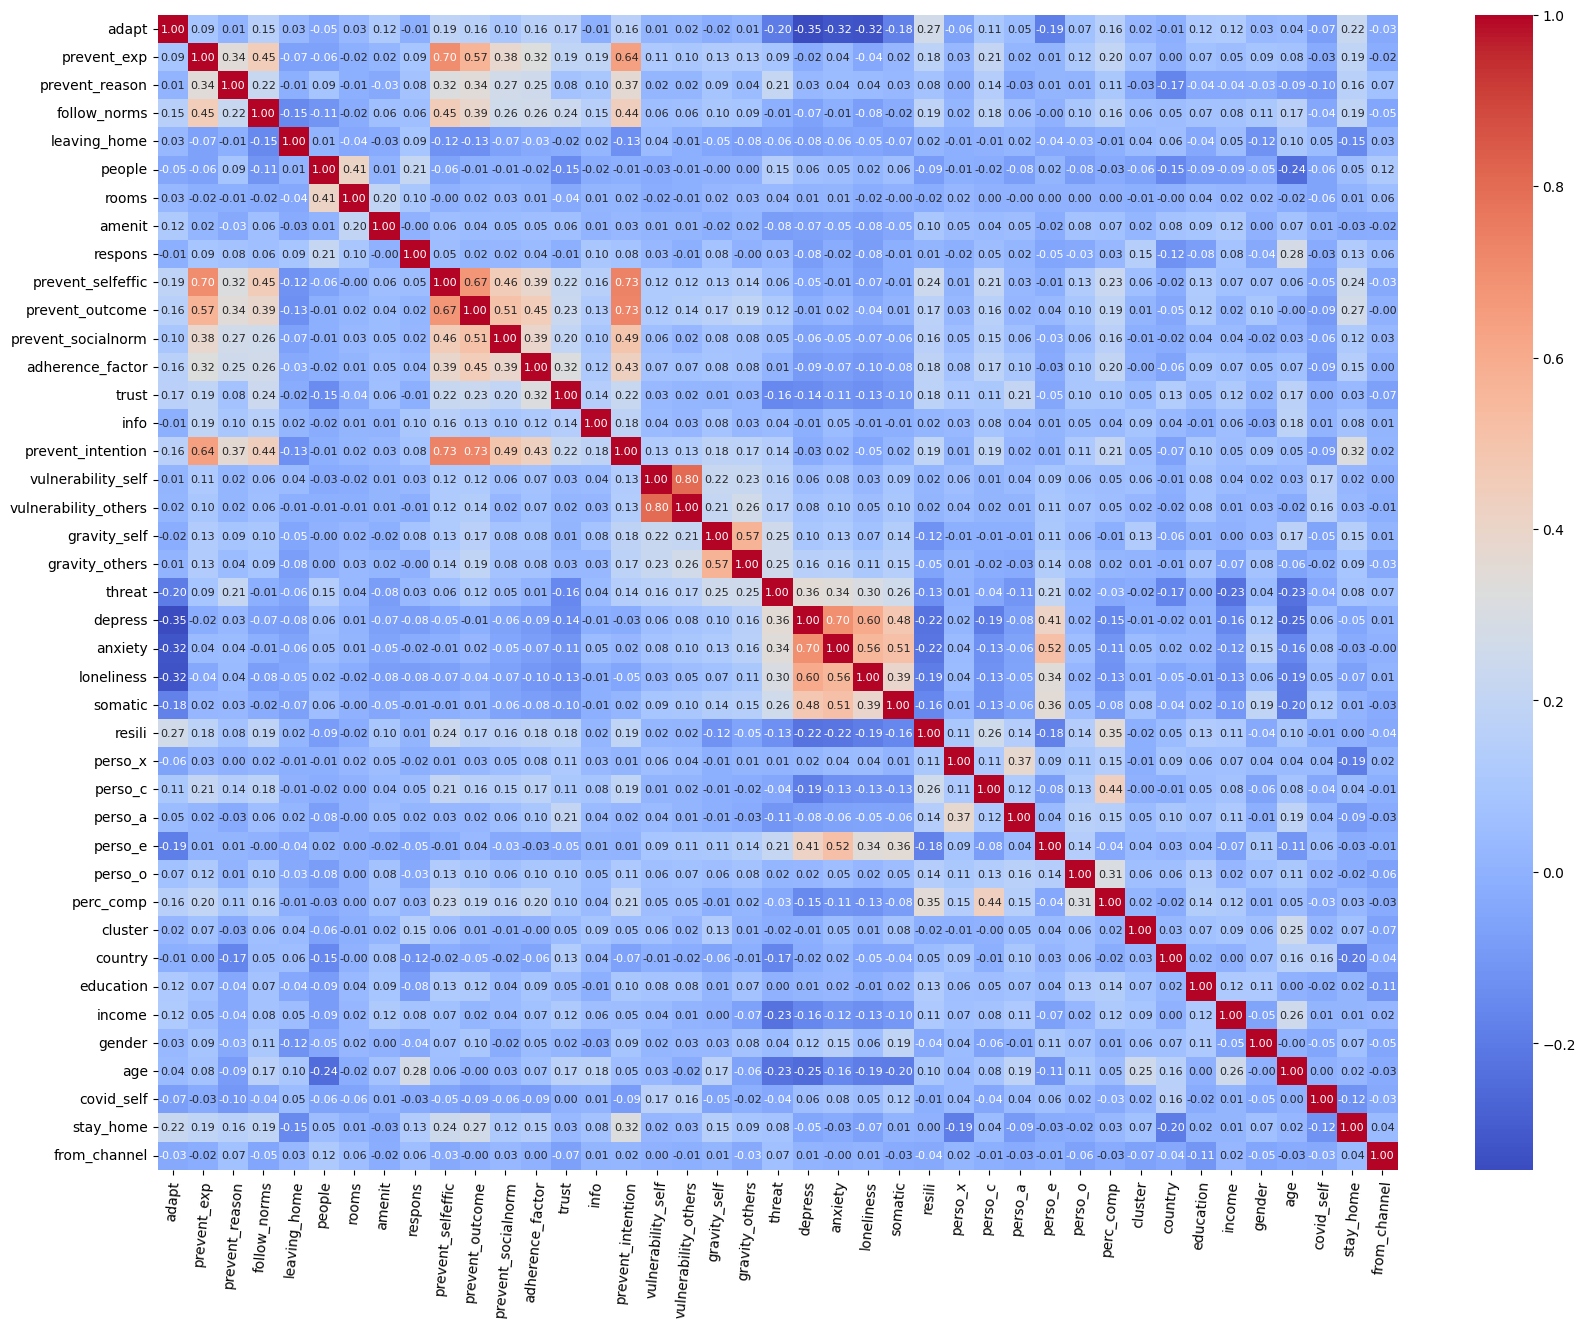

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.drop(['score_G','score_LC','score_resili','label'], axis=1).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size':8})
plt.xticks(rotation=85)
plt.show()

In [ ]:
strong_pairs = corr_matrix.abs().stack().reset_index()
strong_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Filtrar aquellos pares con una correlación >= 0.7 y que no sean la misma variable
strong_pairs = strong_pairs[(strong_pairs['Correlación'] >= 0.7) & (strong_pairs['Variable 1'] != strong_pairs['Variable 2'])]

# Eliminar duplicados, ya que la matriz es simétrica
strong_pairs = strong_pairs.drop_duplicates(subset=['Correlación'])

print(strong_pairs)

             Variable 1            Variable 2  Correlación
50          prevent_exp     prevent_selfeffic     0.703060
384   prevent_selfeffic     prevent_intention     0.732153
425     prevent_outcome     prevent_intention     0.729466
673  vulnerability_self  vulnerability_others     0.802061


Es necesaria la determinacion de aquellas features las cuales tengan mayor correlacion. En este caso vemos que las columnas "prevent_selffic" y "prevent_intention" se encuentran repetidas, por ende se tomara la decision de extraerlas del conjunto de datos original.

Las herramientas de "vulnerability" presentan un alto nivel de correlacion. El criterio para determinar cual feature debe ser extraida se basa en la busqueda de aquella que presente una mayor correlacion con las extraidas previamente. Sin embargo, el criterio establecido no se cumple para este caso debido a que ambas presentan el mismo nivel de correlacion.

Para decididr cual de las dos herramientas debe ser extraida es importante conocer el contexto y objetivo de cada una de ellas:
* vulnerability_self: Describe a probabilidad de que el individuo se contagie en el futuro de coronavirus.
* vulnerability_others: Describe la probabilidad de que, las personas cercanas al entorno del individuo se contagien de coronavirus.

Debio a que la obtencion de la variable objetivo se baso en la autopercepcion del individuo (herramientas "life_change" y "growth"), suena coherente conservar aquellas que hablen sobre la autoevaluacion y percepcion del ambiente y las posibilidades propias de cada individuo.

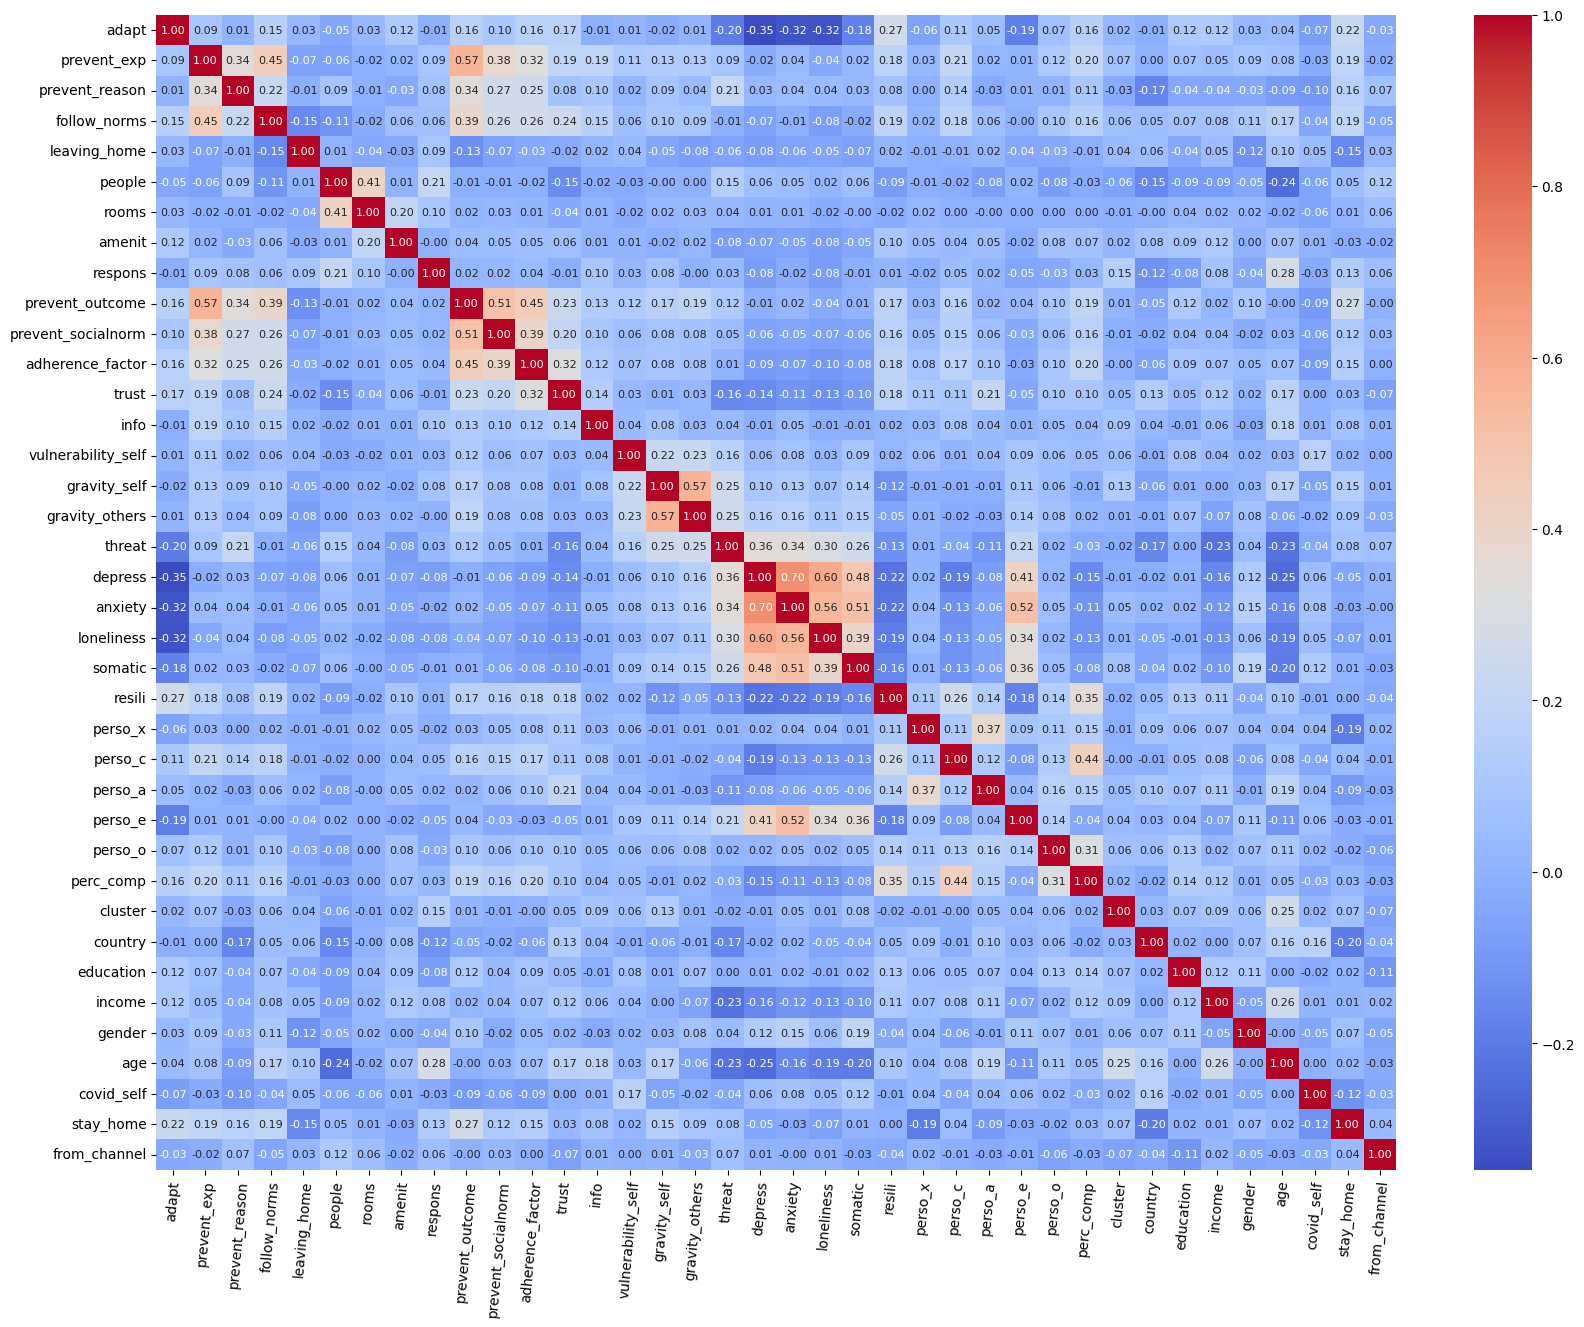

In [ ]:
df.drop(['prevent_selfeffic','prevent_intention','vulnerability_others'], axis=1, inplace=True)
# Calcular la matriz de correlación
corr_matrix =  df.drop(['score_G','score_LC','score_resili','label'], axis=1).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size':8})
plt.xticks(rotation=85)
plt.show()

In [ ]:
strong_pairs = corr_matrix.abs().stack().reset_index()
strong_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Filtrar aquellos pares con una correlación >= 0.7 y que no sean la misma variable
strong_pairs = strong_pairs[(strong_pairs['Correlación'] >= 0.7) & (strong_pairs['Variable 1'] != strong_pairs['Variable 2'])]

# Eliminar duplicados, ya que la matriz es simétrica
strong_pairs = strong_pairs.drop_duplicates(subset=['Correlación'])

print(strong_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlación]
Index: []


Con esto confirmamos que ya no hay valores de correlacion superiores a 0.7

# Contraste entre las clases de interes con la neutra

## Datasplit

**Clase neutra y negativa (1 y 0 respectivamente)**

In [ ]:
# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [0,1]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10000).index.tolist()
    selected_indices.extend(sampled_indices)

selected_data_1 = df.loc[selected_indices]

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(selected_data_1.drop(['label','score_resili','score_G','score_LC'],axis=1),selected_data_1['label'],test_size=0.1,random_state=42)
x_train_1.shape,x_test_1.shape

transform.fit(x_train_1)
x_train_1_norm = pd.DataFrame(transform.transform(x_train_1))
x_test_1_norm = pd.DataFrame(transform.transform(x_test_1))
x_train_1_norm.columns, x_test_1_norm.columns = x_train_1.columns, x_test_1.columns
x_train_1_norm.shape, x_test_1_norm.shape

((18000, 38), (2000, 38))

**Clase neutra y positiva (0 y 1 respectivamente)**

In [ ]:
# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [1,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10000).index.tolist()
    selected_indices.extend(sampled_indices)

selected_data_2 = df.loc[selected_indices]

selected_data_2 = selected_data_2.replace({1:0,2:1})
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(selected_data_2.drop(['label', 'score_resili','score_G','score_LC'],axis=1),selected_data_2['label'],test_size=0.1,random_state=42)
x_train_2.shape,x_test_2.shape

transform.fit(x_train_2)
x_train_2_norm = pd.DataFrame(transform.transform(x_train_2))
x_test_2_norm = pd.DataFrame(transform.transform(x_test_2))
x_train_2_norm.columns, x_test_2_norm.columns = x_train_1.columns, x_test_1.columns
x_train_2_norm.shape, x_test_2_norm.shape

((18000, 38), (2000, 38))

## Seleccion de caracteristicas con arboles de decision

### Primer caso, clase negativa con clase ambigua

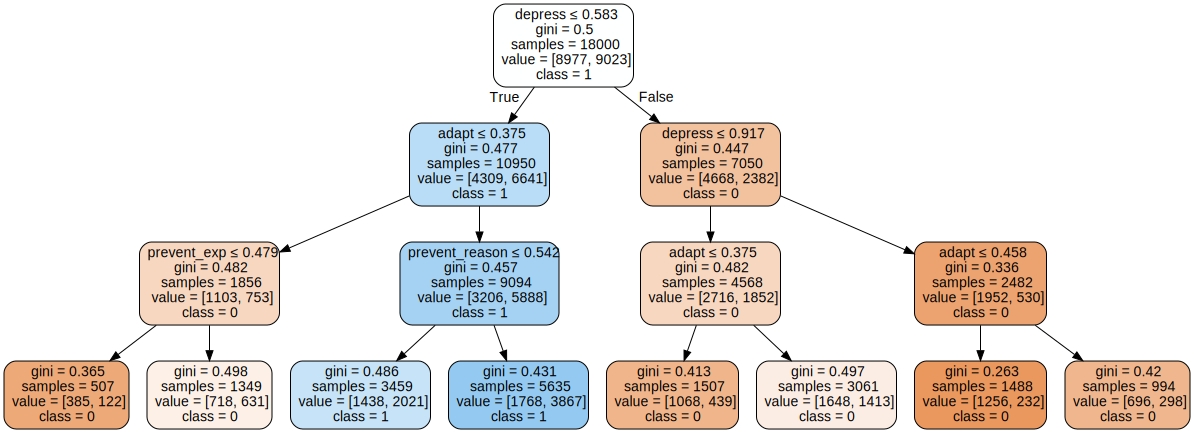

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_1.fit(x_train_1_norm, y_train_1)

dot = export_graphviz(
    tree_1,
    out_file=None,
    feature_names=x_test_1_norm.columns,
    class_names=['0','1'],
    filled=True,
    rounded=True,
    special_characters=True
)

import graphviz
graph = graphviz.Source(dot)
graph

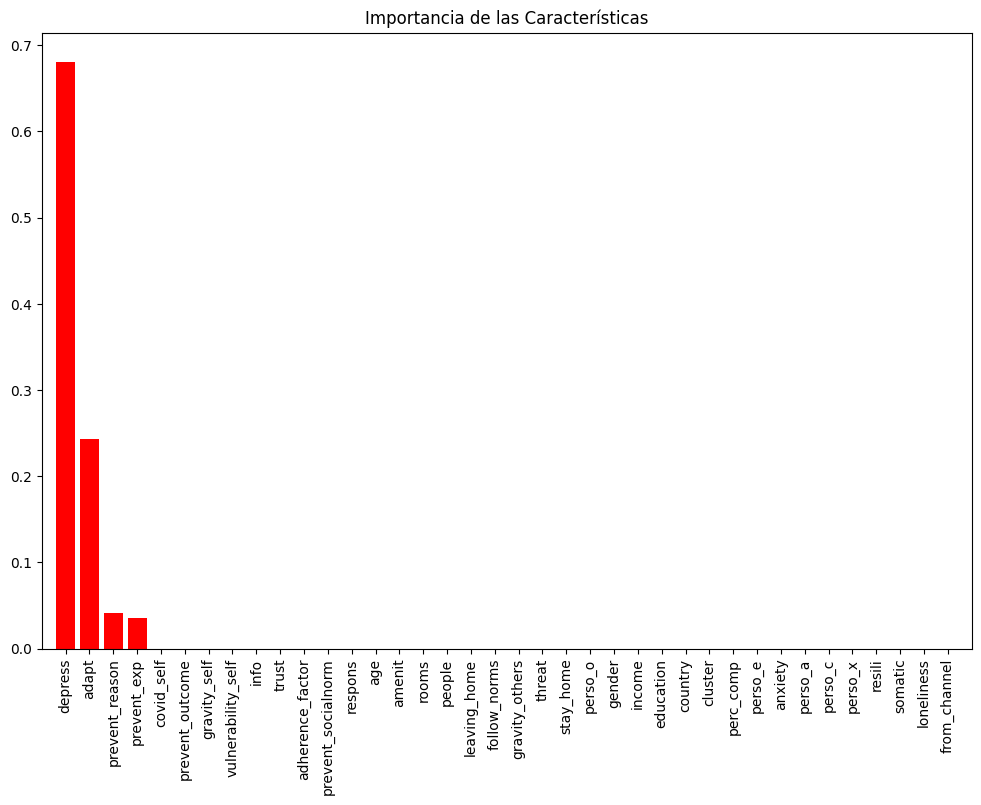

In [ ]:
feature_importances = tree_1.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Importancia de las Características")
plt.bar(range(x_train_1_norm.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(x_train_1_norm.shape[1]), x_train_1_norm.columns[indices], rotation=90)
plt.xlim([-1, x_train_1_norm.shape[1]])
plt.show()

### Segundo caso, clase positiva con clase ambigua

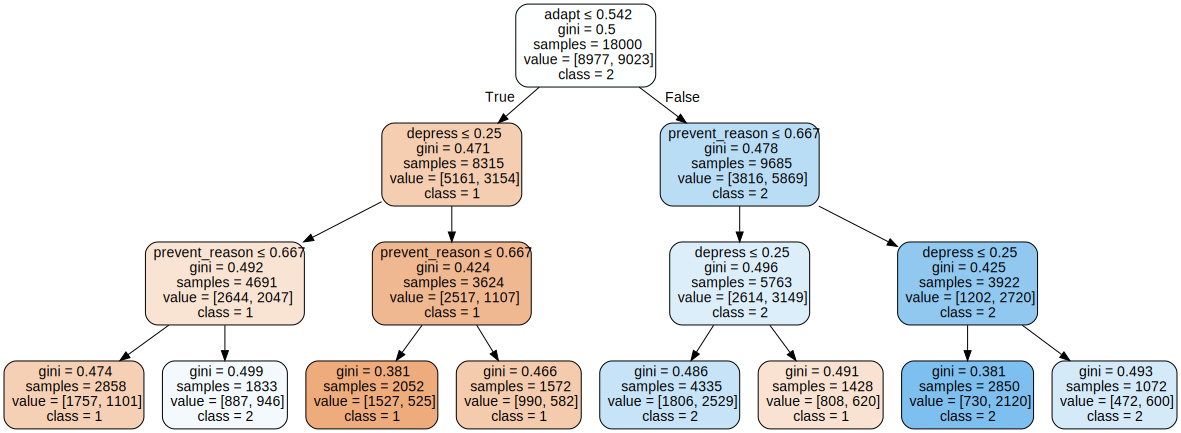

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_2.fit(x_train_2_norm, y_train_2)

dot = export_graphviz(
    tree_2,
    out_file=None,
    feature_names=x_test_2_norm.columns,
    class_names=['1','2'],
    filled=True,
    rounded=True,
    special_characters=True
)

import graphviz
graph = graphviz.Source(dot)
graph

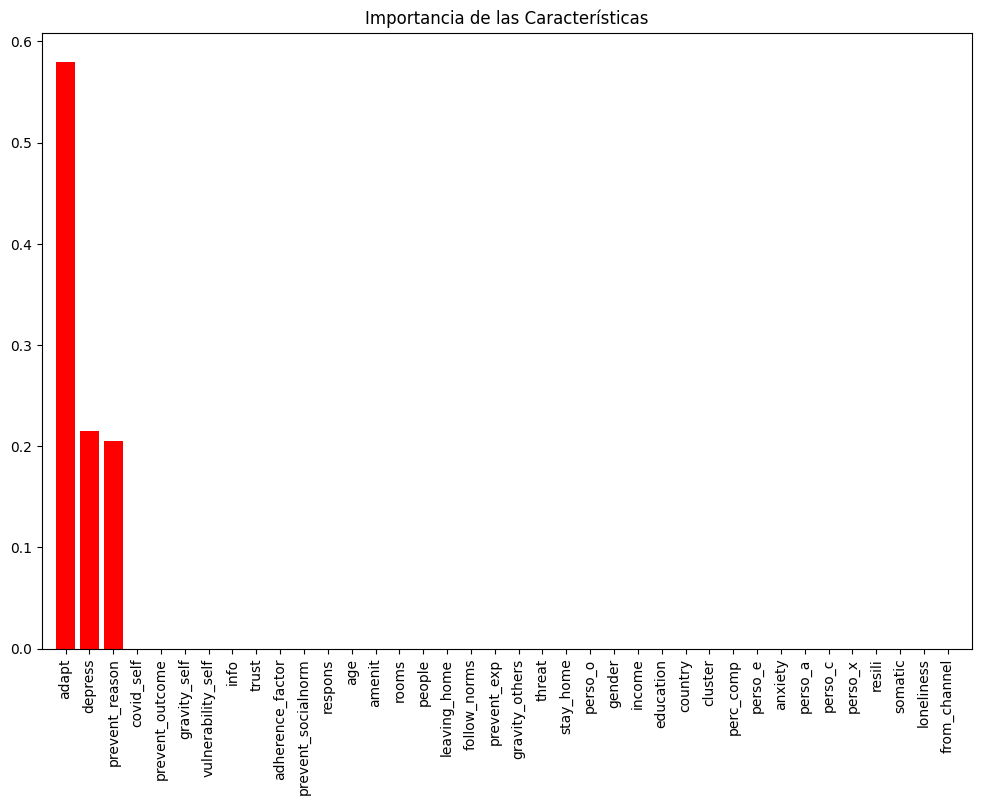

In [ ]:
feature_importances = tree_2.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Importancia de las Características")
plt.bar(range(x_train_2_norm.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(x_train_2_norm.shape[1]), x_train_2_norm.columns[indices], rotation=90)
plt.xlim([-1, x_train_2_norm.shape[1]])
plt.show()

# Contraste entre la clase negativa y la positiva

## Data split

In [53]:
# Seleccionar aleatoriamente 10 observaciones de cada clúster
selected_indices = []
for label in [0,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10000).index.tolist()
    selected_indices.extend(sampled_indices)

selected_data = df.loc[selected_indices]
# Mostrar el nuevo DataFrame
selected_data = selected_data.replace({2:1})
x_train, x_test, y_train, y_test = train_test_split(selected_data.drop(['label','score_resili','score_G','score_LC'],axis=1),selected_data['label'],test_size=0.1,random_state=42)
x_train.shape,x_test.shape

transform.fit(x_train)
x_train_norm = pd.DataFrame(transform.transform(x_train))
x_test_norm = pd.DataFrame(transform.transform(x_test))
x_train_norm.columns, x_test_norm.columns = x_train.columns, x_test.columns
Y_train, Y_test = y_train, y_test

## Prueba de hipotesis y significancia

In [ ]:
y_train.reset_index(drop=True, inplace=True)

In [ ]:
import statsmodels.api as sm

sm_model = sm.Logit(y_train,sm.add_constant(x_train_norm),)
result=sm_model.fit()
stats=result.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.458103
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17961
Method:                           MLE   Df Model:                           38
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.3391
Time:                        23:37:10   Log-Likelihood:                -8245.9
converged:                       True   LL-Null:                       -12477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.7435      0.177    -26.738      0.000      -5.091      -4.396
adapt

El valor p indica el nivel se significancia de las features, aquellas que tienen un valor p > 0.005 se considera que no son tan relevantes para describir el fenomeno que se desea modelar, se modificará el dataset original para tomar solo quellas features que obtuvieron un valor p < 0.005.

In [ ]:
train = x_train_norm[['adapt','prevent_exp','prevent_reason','follow_norms','people','adherence_factor',
'trust','gravity_others','threat','depress','loneliness','somatic','perso_x','perso_c',
'perso_e','perso_o','perc_comp','country','education','income','age','stay_home','from_channel']
]

In [ ]:
sm_model = sm.Logit(y_train,sm.add_constant(train),)
result = sm_model.fit()
stats = result.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.459507
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17976
Method:                           MLE   Df Model:                           23
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.3371
Time:                        23:37:10   Log-Likelihood:                -8271.1
converged:                       True   LL-Null:                       -12477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.8538      0.166    -29.278      0.000      -5.179      -4.529
adapt      

De esta manera se reduce la cantidad de 38 a 23 features necesarias para el entrenamiento, sin embargo, ¿como sabemos que tan bueno es este resultado?

El modelo de regresión logistica de la libreria statsmodels implementa una metrica llamada pseudo coeficiente de determinación (Pseudo R-squ), el cual varia de los rangos 0 a 1, indicando el porcentaje de la varianza que explica el modelo. Sin embargo la información dada por esta métrica es muy poca, es por esto que, para una evaluacion mas completa del modelo se usarán las siguientes scores.

**Accuracy**
La accuracy (exactitud) mide la proporción de predicciones correctas entre el total de casos examinados.\

$Accuracy = \frac{Número de predicciones correctas}{Total de predicciones}$

**AUC Score**
El AUC score (Área Bajo la Curva ROC) es una métrica que se utiliza para evaluar modelos de clasificación binaria. La curva ROC (Receiver Operating Characteristic) es un gráfico que muestra el rendimiento del modelo de clasificación a todos los niveles de umbral de clasificación. Esta curva traza la tasa de verdaderos positivos (TPR, True Positive Rate) frente a la tasa de falsos positivos (FPR, False Positive Rate) a varios umbrales de decisión. **El AUC score representa el área bajo la curva ROC y varía entre 0 y 1. Un AUC de 1 indica un modelo perfecto, mientras que un AUC de 0.5 sugiere un rendimiento no mejor que el azar**. Un AUC menor que 0.5 indica que podrías hacerlo mejor invirtiendo las predicciones del modelo. Esta métrica es particularmente útil porque es invariante a la escala y mide la calidad de las predicciones del modelo sin importar qué umbral se elija.

**F1 Score**
El F1 score es una métrica que combina la precisión (la proporción de verdaderos positivos entre todas las predicciones positivas) y el recall (la proporción de verdaderos positivos entre todas las instancias positivas reales) en un solo número. Se calcula como el promedio armónico de precisión y recall:\

$F1 Score = 2*\frac{Precisión * Recall}{Precisión + Recall}$

In [ ]:
test = x_test_norm[['adapt','prevent_exp','prevent_reason','follow_norms','people','adherence_factor',
'trust','gravity_others','threat','depress','loneliness','somatic','perso_x','perso_c',
'perso_e','perso_o','perc_comp','country','education','income','age','stay_home','from_channel']
]

## Evaluacion del modelo

In [ ]:
y_test.reset_index(drop=True,inplace=True)

In [ ]:
y_pred_probs = result.predict(exog=sm.add_constant(test))
y_pred = (y_pred_probs >= 0.5).astype(int)

Accuracy: 0.778
Matthews Score: 0.5564932251539164
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1023
           1       0.76      0.79      0.78       977

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000

AUC Score: 0.860399151150959


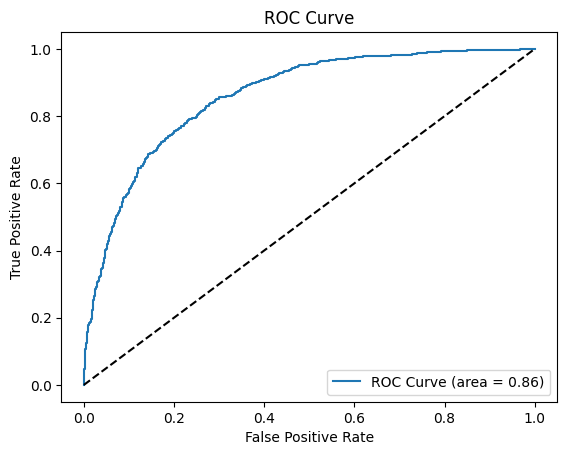

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(y_test,y_pred)}")

print(classification_report(y_test,y_pred))

auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Feature selection con arboles de decision

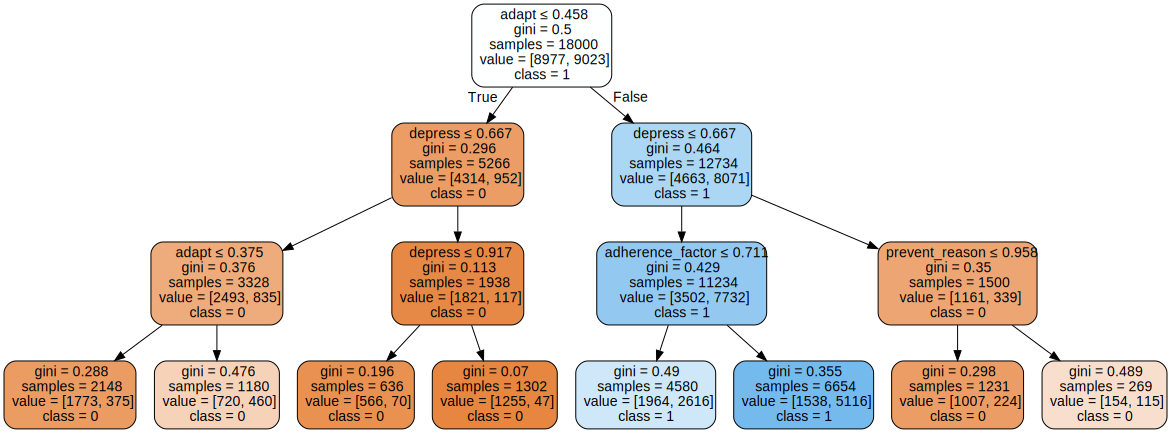

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_1.fit(train, y_train_1)

dot = export_graphviz(
    tree_1,
    out_file=None,
    feature_names=train.columns,
    class_names=['0','1'],
    filled=True,
    rounded=True,
    special_characters=True
)

import graphviz
graph = graphviz.Source(dot)
graph

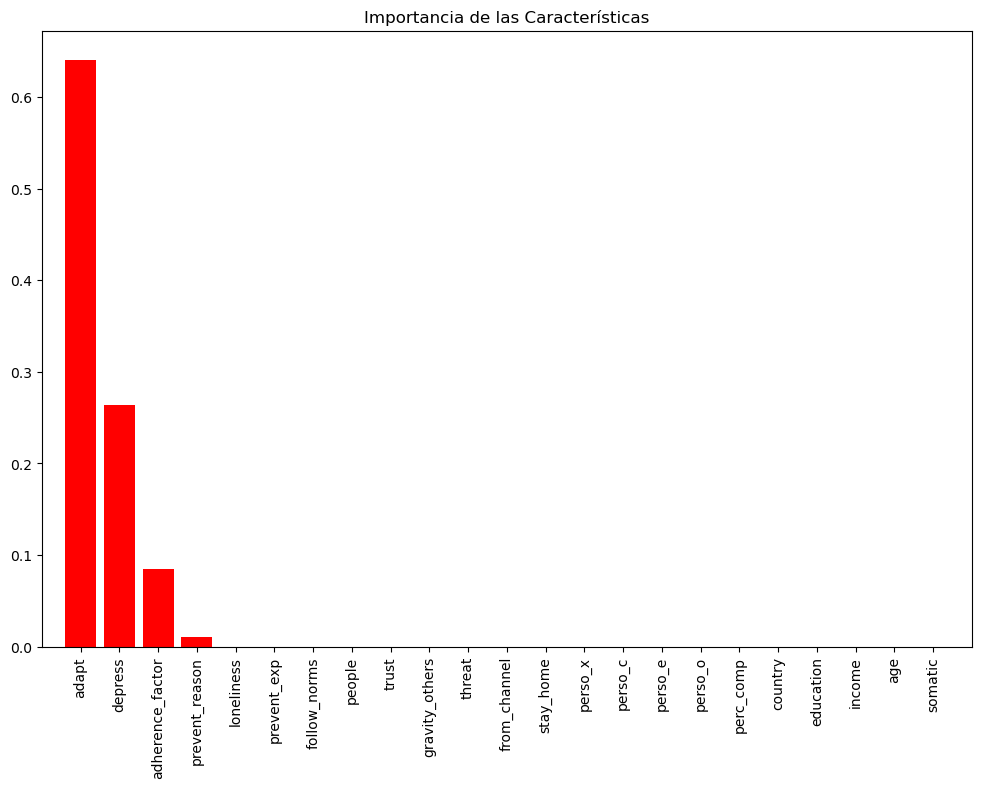

In [ ]:
feature_importances = tree_1.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Importancia de las Características")
plt.bar(range(train.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(train.shape[1]), train.columns[indices], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.show()

## Obtencion de las curvas de aprendizaje

In [ ]:
X=selected_data.drop(['label','score_resili','score_G','score_LC'],axis=1)

In [ ]:
y=selected_data['label']

In [ ]:
X=pd.DataFrame(transform.transform(X))

In [ ]:
y.reset_index(drop=True, inplace=True)

In [ ]:
X.columns = x_train.columns

In [ ]:
X = X[['adapt','prevent_exp','prevent_reason','follow_norms','people','adherence_factor',
'trust','gravity_others','threat','depress','loneliness','somatic','perso_x','perso_c',
'perso_e','perso_o','perc_comp','country','education','income','age','stay_home','from_channel']
]

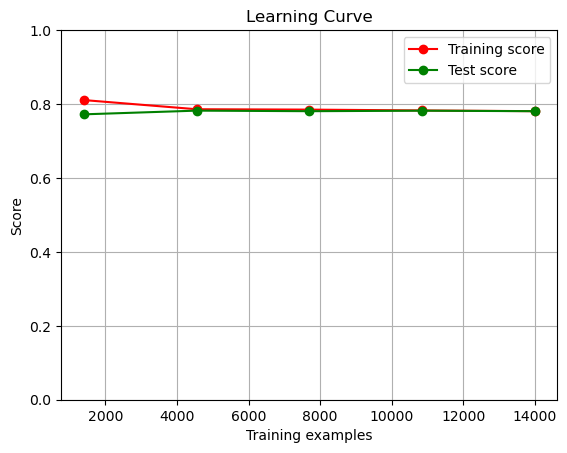

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

def plot_learning_curve(X, y, model, cv):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    train_sizes = np.linspace(0.1, 1.0, 5)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        idx = int(len(X_train_full) * train_size)
        X_train, y_train = X_train_full[:idx], y_train_full[:idx]

        # Entrenar el modelo
        sm_model = sm.Logit(y_train, sm.add_constant(X_train))
        result = sm_model.fit(disp=0)

        # Evaluar el modelo
        train_score = result.predict(sm.add_constant(X_train))
        test_score = result.predict(sm.add_constant(X_test))

        # Convertir las probabilidades a 0 o 1
        train_score = (train_score > 0.5).astype(int)
        test_score = (test_score > 0.5).astype(int)

        # Calcular la precisión
        train_accuracy = np.mean(train_score == y_train)
        test_accuracy = np.mean(test_score == y_test)

        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

    # Graficar las curvas de aprendizaje
    plt.plot(train_sizes * len(X_train_full), train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes * len(X_train_full), test_scores, 'o-', color="g", label="Test score")

    plt.legend(loc="best")
    plt.grid(True)
    plt.ylim(0, 1)

# Preparar los datos (X, y) y llamar a la función
# Nota: Reemplazar 'X' y 'y' con los datos preparados
plot_learning_curve(X, y, sm.Logit, cv=StratifiedKFold(n_splits=5))

In [ ]:
X= X[['adapt','depress','adherence_factor','prevent_reason']]

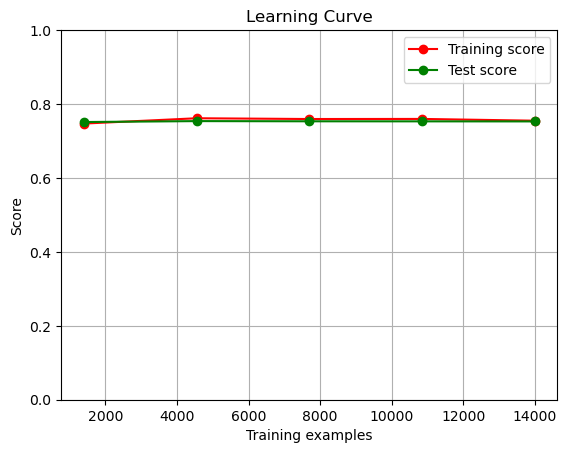

In [ ]:
def plot_learning_curve(X, y, model, cv):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    train_sizes = np.linspace(0.1, 1.0, 5)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        idx = int(len(X_train_full) * train_size)
        X_train, y_train = X_train_full[:idx], y_train_full[:idx]

        # Entrenar el modelo
        sm_model = sm.Logit(y_train, sm.add_constant(X_train))
        result = sm_model.fit(disp=0)

        # Evaluar el modelo
        train_score = result.predict(sm.add_constant(X_train))
        test_score = result.predict(sm.add_constant(X_test))

        # Convertir las probabilidades a 0 o 1
        train_score = (train_score > 0.5).astype(int)
        test_score = (test_score > 0.5).astype(int)

        # Calcular la precisión
        train_accuracy = np.mean(train_score == y_train)
        test_accuracy = np.mean(test_score == y_test)

        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

    # Graficar las curvas de aprendizaje
    plt.plot(train_sizes * len(X_train_full), train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes * len(X_train_full), test_scores, 'o-', color="g", label="Test score")

    plt.legend(loc="best")
    plt.grid(True)
    plt.ylim(0, 1)

# Preparar los datos (X, y) y llamar a la función
# Nota: Reemplazar 'X' y 'y' con los datos preparados
plot_learning_curve(X, y, sm.Logit, cv=StratifiedKFold(n_splits=5))

Las curvas de score de entrenamiento y prueba están superpuestas y ambas tienen un valor aproximado de 0.75, esto sugiere varias cosas:

1. **Buen balance entre sesgo y varianza**: La superposición de las curvas indica que el modelo no está sobreajustando los datos. Hay un buen equilibrio entre el aprendizaje de los patrones en los datos de entrenamiento y la generalización a nuevos datos.

1. **Poco margen de mejora con más datos**: Ya que ambas curvas son planas y no hay una tendencia ascendente en la curva del score de prueba, es probable que añadir más datos de entrenamiento no mejore significativamente el desempeño del modelo. El modelo ya ha alcanzado su capacidad de rendimiento con el tamaño actual de los datos de entrenamiento.

1. **Potencial limitación del modelo o de los datos**: Si la puntuación de 0.75 es más baja de lo deseado para tu tarea específica, puede ser una indicación de que el modelo actual tiene limitaciones inherentes para capturar la complejidad de los datos, o que los datos no contienen suficiente información para hacer predicciones más precisas.

1. **Consistencia**: El modelo es consistente en su rendimiento tanto en datos conocidos (entrenamiento) como desconocidos (prueba), lo que es una buena señal de robustez.

En resumen, si las curvas de aprendizaje de entrenamiento y prueba están superpuestas con una puntuación constante de 0.75, significa que el modelo es estable y generaliza bien, pero puede haber alcanzado su límite de rendimiento dada la complejidad actual del modelo y la riqueza de información en los datos.

## Analisis de separabilidad

**Herramienta adapt**

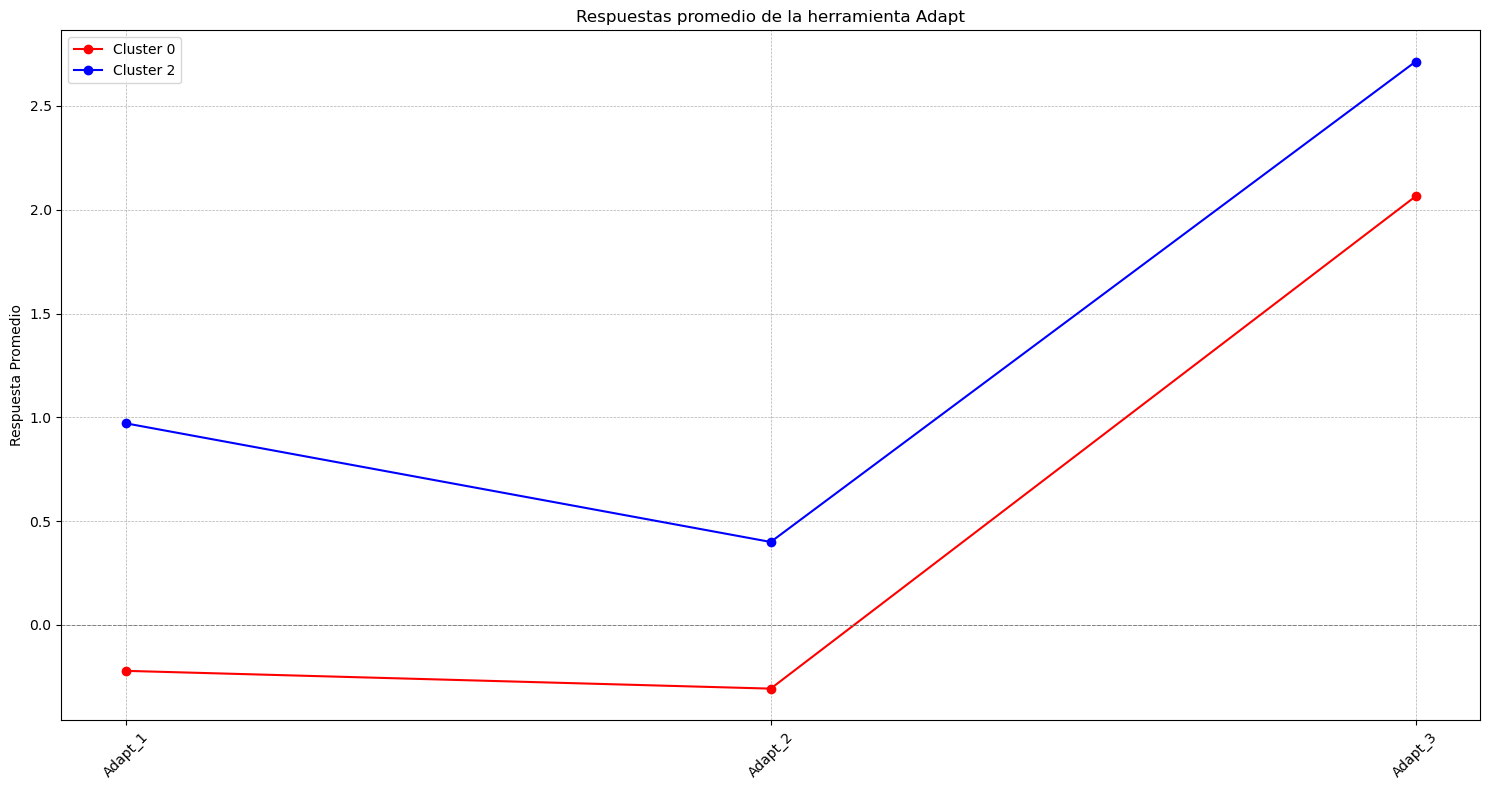

Adapt_1   Adapt_2   Adapt_3
label                              
0     -0.221539 -0.307183  2.064351
1      0.428703  0.047680  2.398115
2      0.970986  0.399450  2.713467

In [ ]:
cluster_means = df_raw.groupby('label')[['Adapt_1', 'Adapt_2', 'Adapt_3',]].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip([0,2], ['red', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Adapt')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

**Herramienta depress**

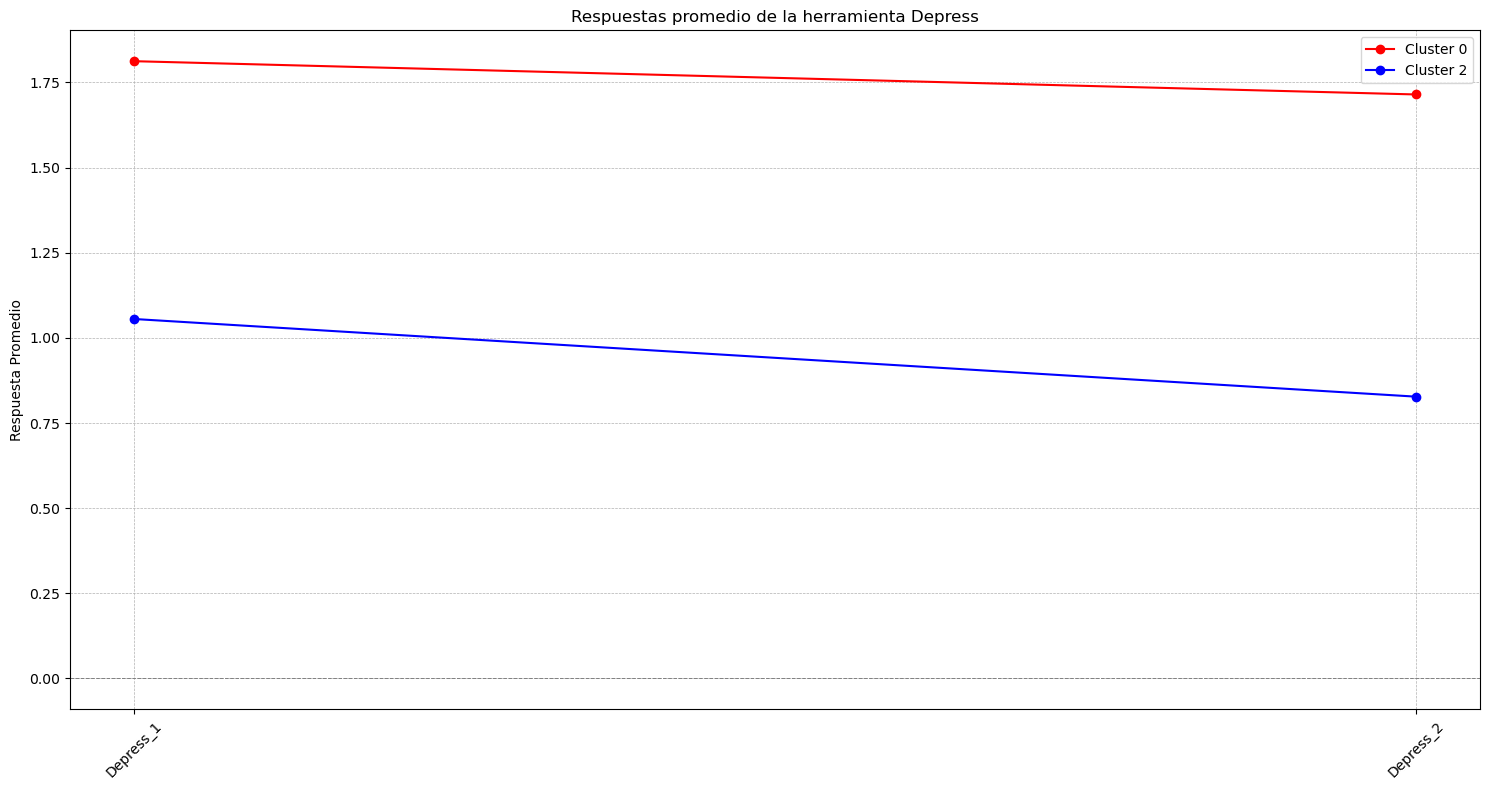

In [ ]:
cluster_means = df_raw.groupby('label')[['Depress_1', 'Depress_2',]].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip([0,2], ['red', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Depress')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**Herramienta adherence_factor**

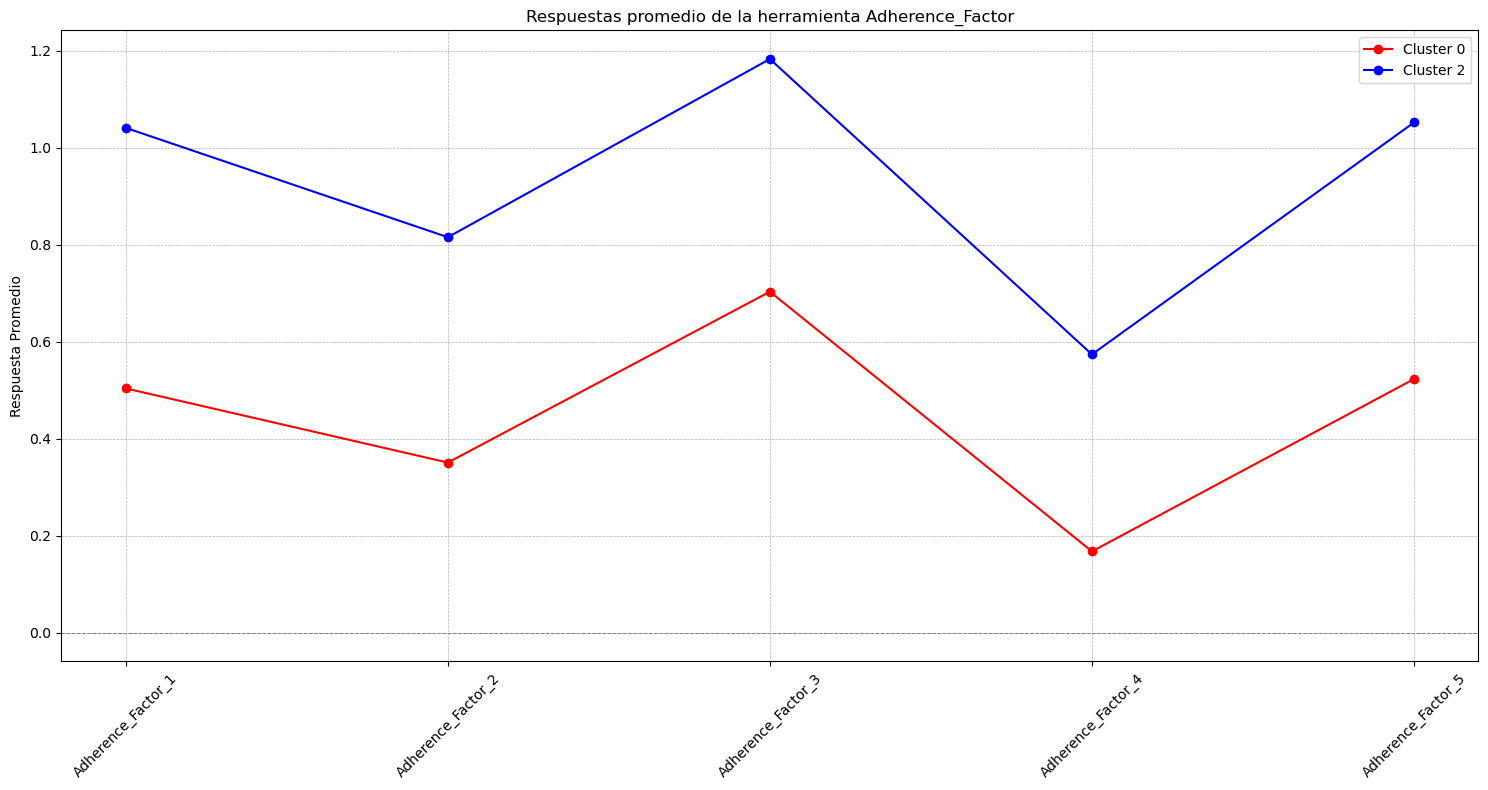

Adherence_Factor_1  Adherence_Factor_2  Adherence_Factor_3  \
label                                                               
0                0.503643            0.350714            0.703038   
1                0.785440            0.571683            0.972117   
2                1.040759            0.815339            1.182716   

       Adherence_Factor_4  Adherence_Factor_5  
label                                          
0                0.167597            0.522949  
1                0.350703            0.788502  
2                0.573714            1.051908

In [ ]:
cluster_means = df_raw.groupby('label')[['Adherence_Factor_1', 'Adherence_Factor_2', 'Adherence_Factor_3', 'Adherence_Factor_4',
                                         'Adherence_Factor_5']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip([0,2], ['red', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Adherence_Factor')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

**Herramienta prevent_reason**

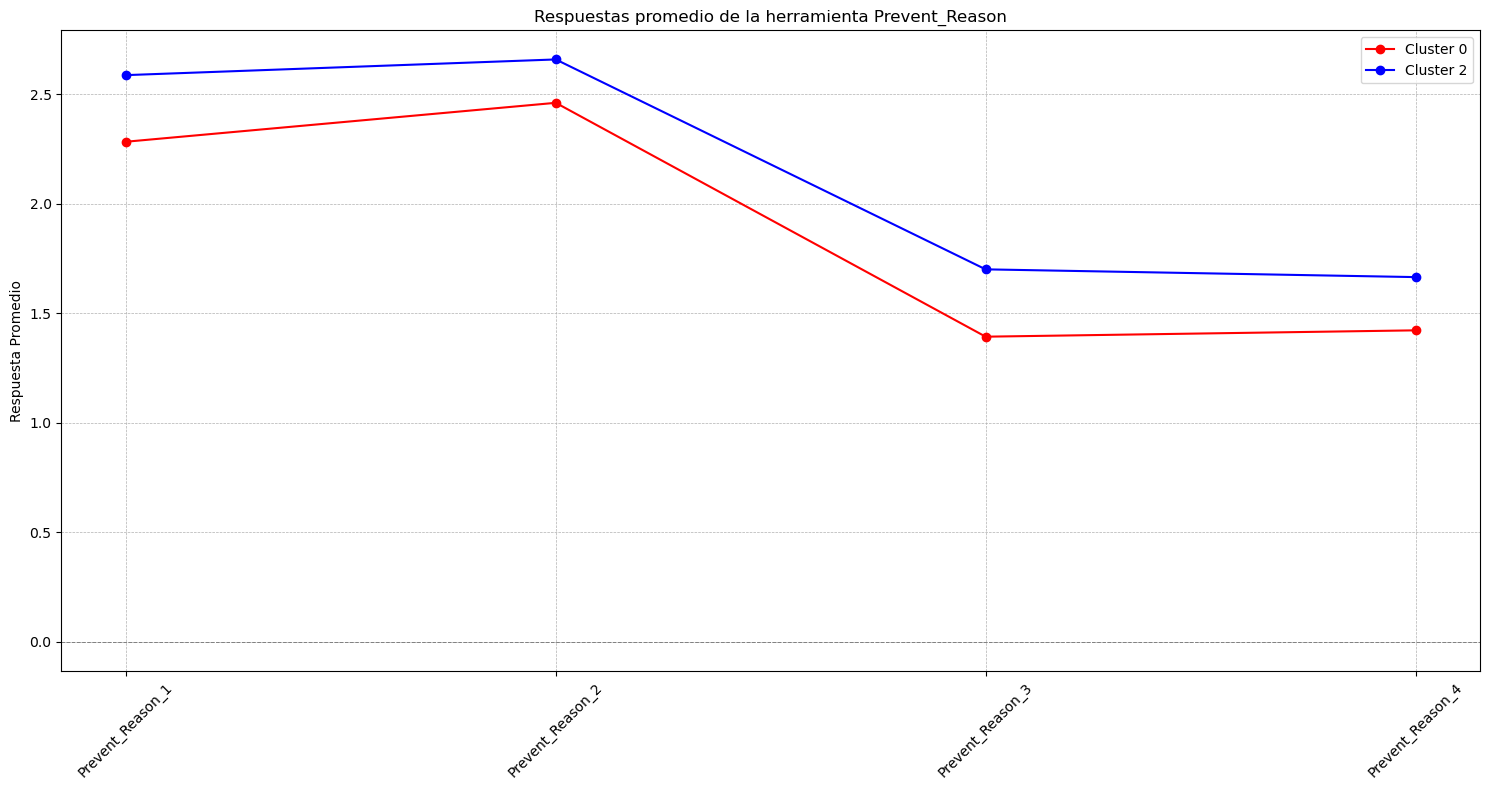

Prevent_Reason_1  Prevent_Reason_2  Prevent_Reason_3  Prevent_Reason_4
label                                                                        
0              2.282389          2.460112          1.392354          1.421312
1              2.434410          2.551024          1.465474          1.451235
2              2.586523          2.658136          1.699777          1.664385

In [ ]:
cluster_means = df_raw.groupby('label')[['Prevent_Reason_1', 'Prevent_Reason_2', 'Prevent_Reason_3', 'Prevent_Reason_4']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip([0,2], ['red', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

plt.title('Respuestas promedio de la herramienta Prevent_Reason')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

# Preparacion

In [ ]:
selected_indices = []
for label in [0,2]:
    cluster_group = df[df['label'] == label]
    sampled_indices = cluster_group.sample(n=10000).index.tolist()
    selected_indices.extend(sampled_indices)

selected_data = df.loc[selected_indices]
# Mostrar el nuevo DataFrame
selected_data = selected_data.replace({2:1})
df_transformed = selected_data[['adapt','depress','adherence_factor','prevent_reason','label']]
print(df_transformed.shape)
df_transformed.head(1)

(20000, 5)


adapt  depress  adherence_factor  prevent_reason  label
48627    0.0      1.5               0.2            1.75      0

In [ ]:
from sklearn.preprocessing import QuantileTransformer

data = df_transformed['adapt'].values.reshape(-1, 1)

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df_transformed['adapt_1'] = quantile_transformer.fit_transform(data).flatten()

data = df_transformed['depress'].values.reshape(-1, 1)

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df_transformed['depress_1'] = quantile_transformer.fit_transform(data).flatten()

data = df_transformed['adherence_factor'].values.reshape(-1, 1)

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df_transformed['adherence_factor_1'] = quantile_transformer.fit_transform(data).flatten()

data = df_transformed['prevent_reason'].values.reshape(-1, 1)

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df_transformed['prevent_reason_1'] = quantile_transformer.fit_transform(data).flatten()

C:\Users\sweet\AppData\Local\Temp\ipykernel_19096\2461097137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['adapt_1'] = quantile_transformer.fit_transform(data).flatten()
C:\Users\sweet\AppData\Local\Temp\ipykernel_19096\2461097137.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['depress_1'] = quantile_transformer.fit_transform(data).flatten()
C:\Users\sweet\AppData\Local\Temp\ipykernel_19096\2461097137.py:16: SettingWithCopyWarning: 
A value is trying to be set on a

In [ ]:
df_transformed

adapt  depress  adherence_factor  prevent_reason  label   adapt_1  \
48627  0.000000      1.5               0.2            1.75      0 -0.961429   
39902  0.333333      3.0               0.4            1.50      0 -0.672129   
40021 -0.666667      3.0              -0.2            1.50      0 -1.575613   
29544  2.333333      0.5               0.2            1.00      0  1.786156   
36072  0.000000      1.5              -1.4            1.75      0 -0.961429   
...         ...      ...               ...             ...    ...       ...   
54960  1.000000      3.0               1.0            2.50      1  0.075345   
8973   1.000000      1.0               0.6            1.00      1  0.075345   
3100   2.666667      0.0               1.4            3.00      1  5.199338   
2589   1.000000      0.0               1.0            2.75      1  0.075345   
52806  1.666667      0.5               0.6            1.00      1  1.135284   

       depress_1  adherence_factor_1  prevent_reason_1  
48627   0.662724           -0.602943          0.135911  
39902   5.199338           -0.404717         -0.227777  
40021   5.199338           -1.135284         -0.227777  
29544  -0.848075           -0.602943         -1.059682  
36072   0.662724           -2.074445          0.135911  
...          ...                 ...               ...  
54960   5.199338            0.429351          0.658043  
8973   -0.067799           -0.184203         -1.059682  
3100   -5.199338            1.181921          5.199338  
2589   -5.199338            0.429351          0.868016  
52806  -0.848075           -0.184203         -1.059682  

[20000 rows x 9 columns]

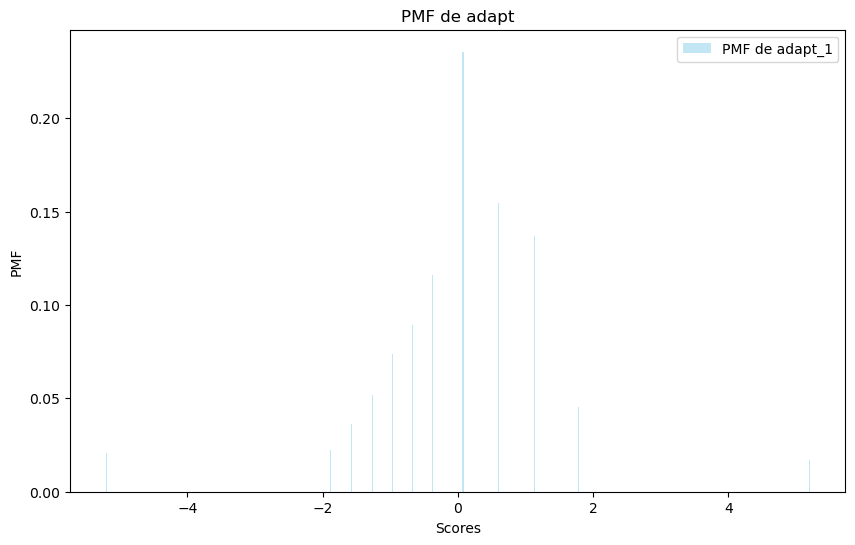

In [ ]:
values_gauss, counts_gauss = np.unique(df_transformed['adapt_1'] , return_counts=True)
pmf_gauss = counts_gauss / counts_gauss.sum()


plt.figure(figsize=(10, 6))
plt.bar(values_gauss, pmf_gauss, width=0.02, alpha=0.5, color='skyblue', label='PMF de adapt_1')

# Descripciones de la gráfica
plt.title('PMF de adapt')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

In [ ]:
# Calcular el rango intercuartílico (IQR)

cols = ['adapt_1','depress_1','adherence_factor_1','prevent_reason_1']

for column in cols:

    Q1 = df_transformed[column].quantile(0.25)
    Q3 = df_transformed[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para considerar un valor como outlier
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los valores que están fuera de los límites
    df_transformed = df_transformed[(df_transformed[column] >= limite_inferior) & (df_transformed[column] <= limite_superior)]

In [ ]:
df_transformed['label'].value_counts()

label
0    5944
1    5902
Name: count, dtype: int64

In [ ]:
df_transformed.shape

(11846, 9)

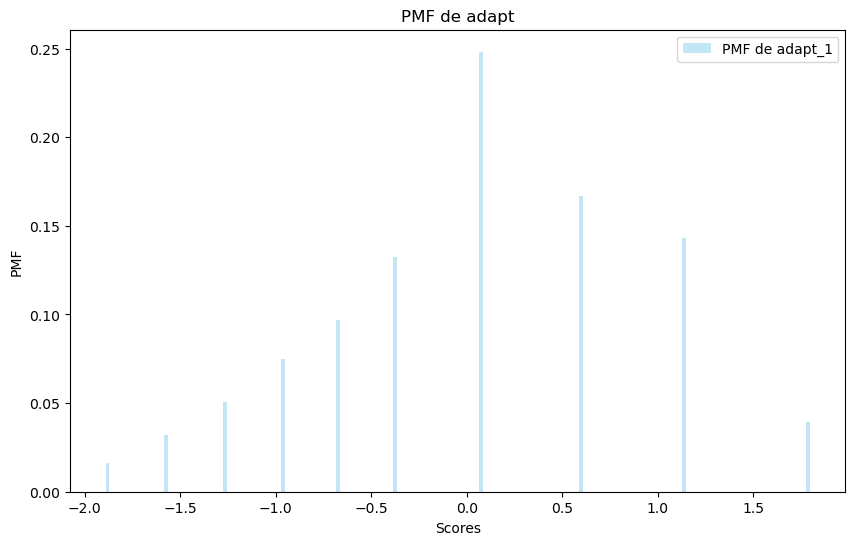

In [ ]:
values_gauss, counts_gauss = np.unique(df_transformed['adapt_1'] , return_counts=True)
pmf_gauss = counts_gauss / counts_gauss.sum()


plt.figure(figsize=(10, 6))
plt.bar(values_gauss, pmf_gauss, width=0.02, alpha=0.5, color='skyblue', label='PMF de adapt_1')

# Descripciones de la gráfica
plt.title('PMF de adapt')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

# Estudio de densidad de la features por etiqueta mediante PMF

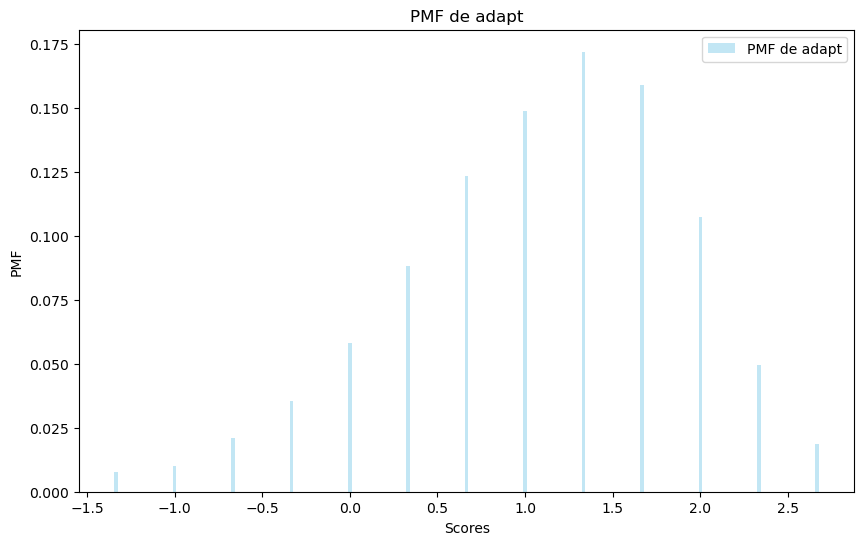

In [ ]:
# Calcula las PMF de cada score
values_adapt, counts_adapt = np.unique(df['adapt'], return_counts=True)
pmf_adapt = counts_adapt / counts_adapt.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_adapt, pmf_adapt, width=0.02, alpha=0.5, color='skyblue', label='PMF de adapt')

# Descripciones de la gráfica
plt.title('PMF de adapt')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

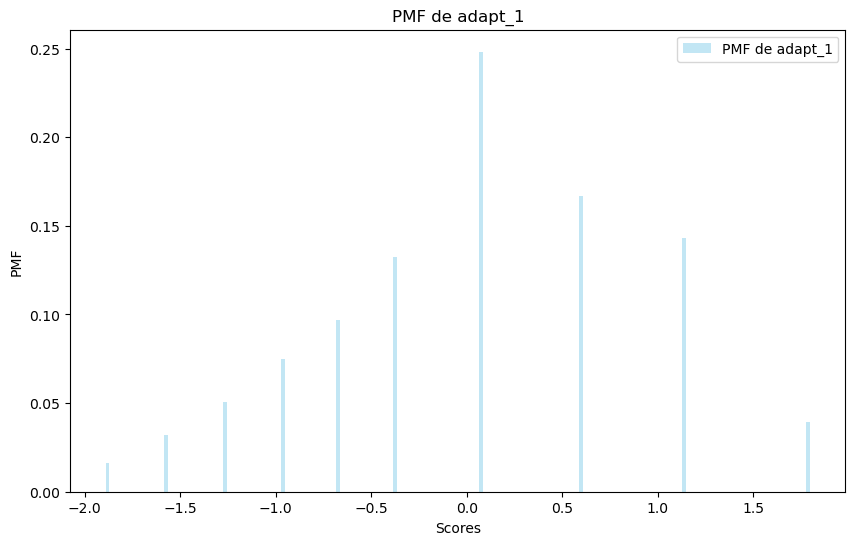

In [ ]:
values_gauss, counts_gauss = np.unique(df_transformed['adapt_1'] , return_counts=True)
pmf_gauss = counts_gauss / counts_gauss.sum()


plt.figure(figsize=(10, 6))
plt.bar(values_gauss, pmf_gauss, width=0.02, alpha=0.5, color='skyblue', label='PMF de adapt_1')

# Descripciones de la gráfica
plt.title('PMF de adapt_1')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

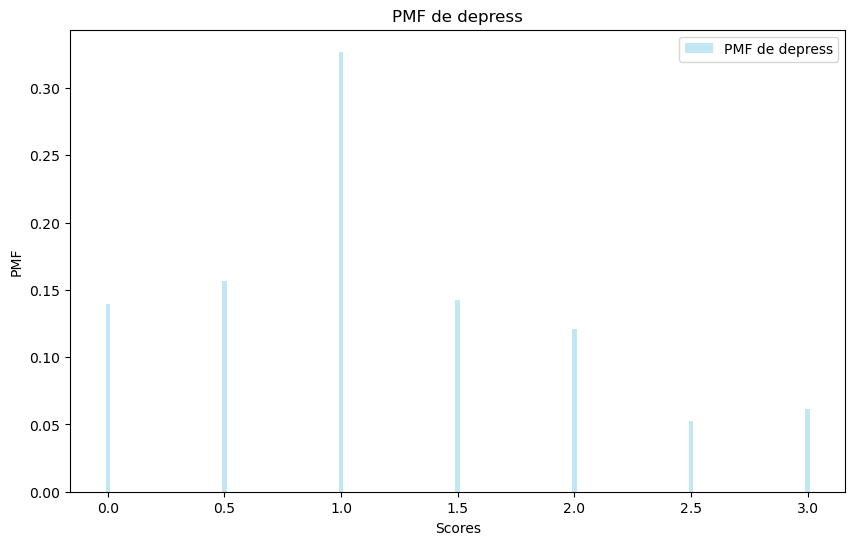

In [ ]:
# Calcula las PMF de cada score
values_depress, counts_depress = np.unique(df['depress'], return_counts=True)
pmf_depress = counts_depress / counts_depress.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_depress, pmf_depress, width=0.02, alpha=0.5, color='skyblue', label='PMF de depress')

# Descripciones de la gráfica
plt.title('PMF de depress')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

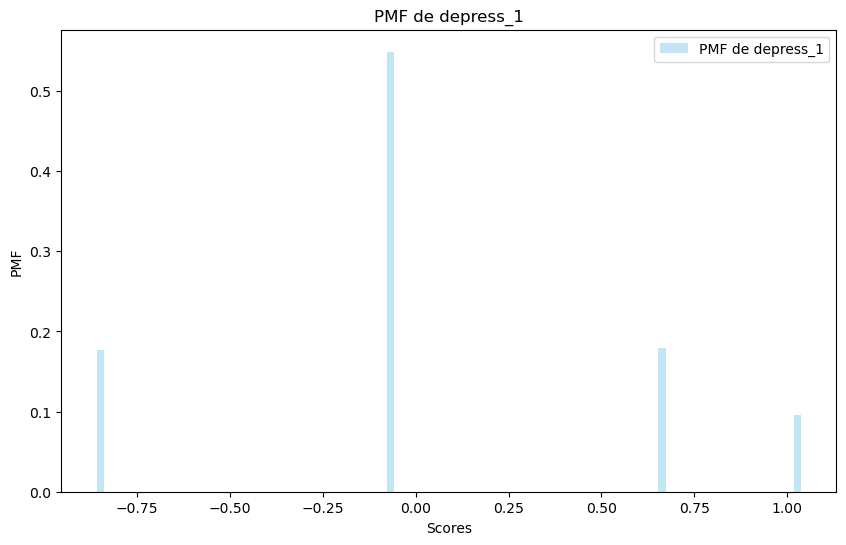

In [ ]:
values_gauss, counts_gauss = np.unique(df_transformed['depress_1'] , return_counts=True)
pmf_gauss = counts_gauss / counts_gauss.sum()


plt.figure(figsize=(10, 6))
plt.bar(values_gauss, pmf_gauss, width=0.02, alpha=0.5, color='skyblue', label='PMF de depress_1')

# Descripciones de la gráfica
plt.title('PMF de depress_1')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

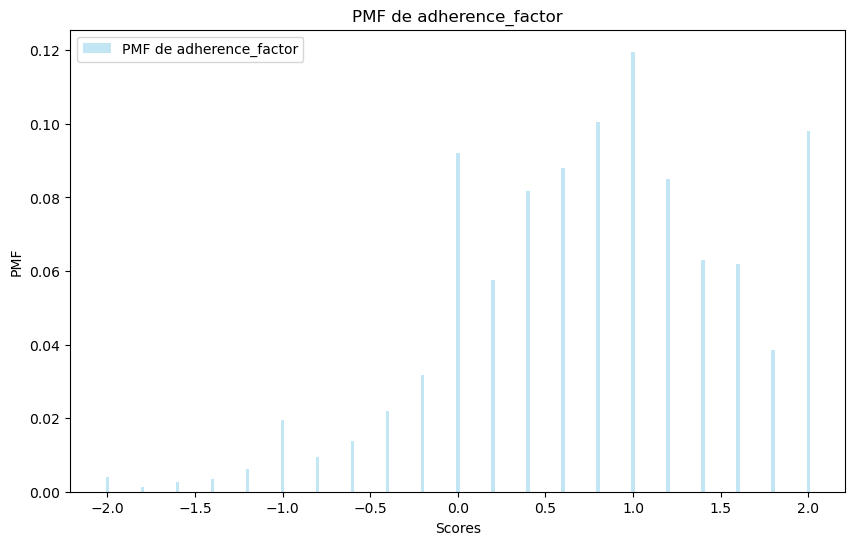

In [ ]:
# Calcula las PMF de cada score
values_adherence_factor, counts_adherence_factor = np.unique(df['adherence_factor'], return_counts=True)
pmf_adherence_factor = counts_adherence_factor / counts_adherence_factor.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_adherence_factor, pmf_adherence_factor, width=0.02, alpha=0.5, color='skyblue', label='PMF de adherence_factor')

# Descripciones de la gráfica
plt.title('PMF de adherence_factor')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

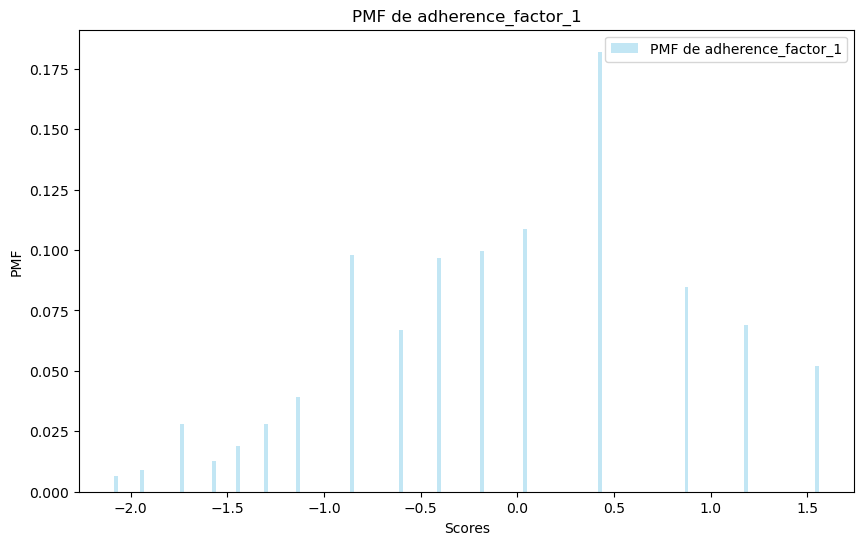

In [ ]:
values_gauss, counts_gauss = np.unique(df_transformed['adherence_factor_1'] , return_counts=True)
pmf_gauss = counts_gauss / counts_gauss.sum()


plt.figure(figsize=(10, 6))
plt.bar(values_gauss, pmf_gauss, width=0.02, alpha=0.5, color='skyblue', label='PMF de adherence_factor_1')

# Descripciones de la gráfica
plt.title('PMF de adherence_factor_1')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

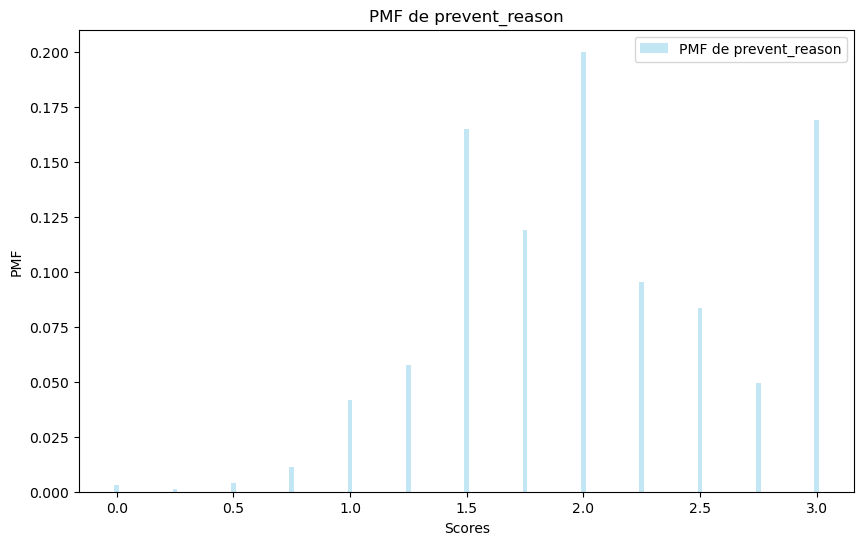

In [ ]:
# Calcula las PMF de cada score
values_perc_comp, counts_perc_comp = np.unique(df['prevent_reason'], return_counts=True)
pmf_perc_comp = counts_perc_comp / counts_perc_comp.sum()

# Graficar las PMF de los scores
plt.figure(figsize=(10, 6))
plt.bar(values_perc_comp, pmf_perc_comp, width=0.02, alpha=0.5, color='skyblue', label='PMF de prevent_reason')

# Descripciones de la gráfica
plt.title('PMF de prevent_reason')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

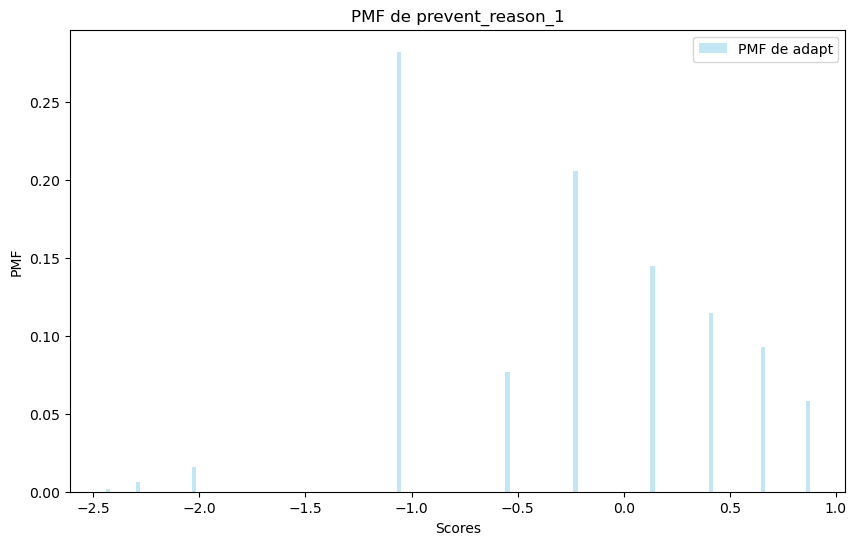

In [ ]:
values_gauss, counts_gauss = np.unique(df_transformed['prevent_reason_1'] , return_counts=True)
pmf_gauss = counts_gauss / counts_gauss.sum()


plt.figure(figsize=(10, 6))
plt.bar(values_gauss, pmf_gauss, width=0.02, alpha=0.5, color='skyblue', label='PMF de adapt')

# Descripciones de la gráfica
plt.title('PMF de prevent_reason_1')
plt.xlabel('Scores')
plt.ylabel('PMF')
plt.legend();

# Determinacion la efectividad de la transformacion

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_transformed.drop(['label'],axis=1),df_transformed['label'],test_size=0.2,random_state=42)
x_train.shape,x_test.shape

transform.fit(x_train)
x_train_norm = pd.DataFrame(transform.transform(x_train))
x_test_norm = pd.DataFrame(transform.transform(x_test))
x_train_norm.columns, x_test_norm.columns = x_train.columns, x_test.columns
x_train_norm.shape, x_test_norm.shape

((9476, 8), (2370, 8))

# Entrenamiento de modelos

## Datasplit

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_transformed.drop(['label'],axis=1),df_transformed['label'],test_size=0.2,random_state=42)
x_train.shape,x_test.shape

transform.fit(x_train)
x_train_norm = pd.DataFrame(transform.transform(x_train))
x_test_norm = pd.DataFrame(transform.transform(x_test))
x_train_norm.columns, x_test_norm.columns = x_train.columns, x_test.columns
x_train_norm.shape, x_test_norm.shape

((9476, 8), (2370, 8))

In [ ]:
y_train.reset_index(drop=True, inplace=True)

In [ ]:
sm_model = sm.Logit(y_train,sm.add_constant(x_train_norm.iloc[:,4:]),)
result=sm_model.fit()
stats=result.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.567994
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 9476
Model:                          Logit   Df Residuals:                     9471
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.1806
Time:                        17:06:16   Log-Likelihood:                -5382.3
converged:                       True   LL-Null:                       -6568.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.8310      0.117    -24.104      0.000      -3.061      -2.601
adapt

In [ ]:
y_pred_probs = result.predict(exog=sm.add_constant(x_test_norm.iloc[:,4:]))
y_pred = (y_pred_probs >= 0.5).astype(int)

Accuracy: 0.6869198312236287
Matthews Score: 0.3737891918381427
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      1220
           1       0.67      0.69      0.68      1150

    accuracy                           0.69      2370
   macro avg       0.69      0.69      0.69      2370
weighted avg       0.69      0.69      0.69      2370

AUC Score: 0.7584230220955096


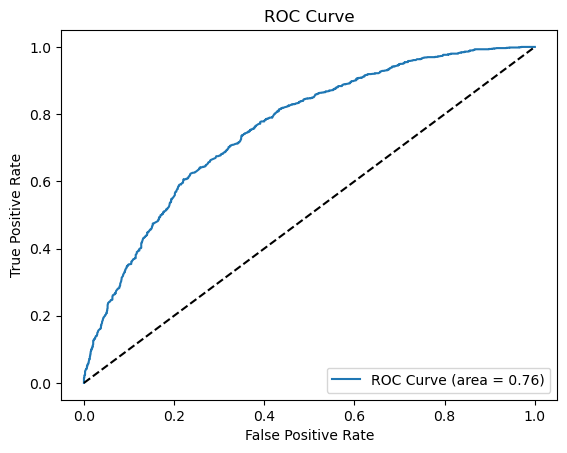

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(y_test,y_pred)}")

print(classification_report(y_test,y_pred))

auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Es dificil encontrar una herramienta de transofrmacion adecuada debido a la naturaleza de los datos. El objetivo de la transformacion es mejorar la distribucion de los datos con el fin de mejorar el rendimiento del modelo. Al realizar una transformacion por quantiles se crearon outlayers en los extremos de cada herramienta. La extraccion de outlayers es vital para lograr una correcta generalizacion por parte del modelo, asi mismo es necesario considerar que cada variable es independiente entre si, esto quiere decir que quitar los outlayers de una herramienta no garantiza quitar los de las demas. Las consecuencias de esto se ve en una clara disminucion en el tamaño del conjunto de datos, ya que paso de 20k a poco mas de 11k, la sustraccion de informacion genera una perdida en la generalizacion, ya que se captura en menor medida esa limitada y compleja vision de la realidad.

## Regresion logistica con statsmodels

In [ ]:
train = train[['adapt','depress','adherence_factor','prevent_reason']]

In [ ]:
y_train.reset_index(drop=True,inplace=True)

In [ ]:
sm_model = sm.Logit(Y_train,sm.add_constant(train),).fit()
stats=sm_model.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.501534
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                18000
Model:                          Logit   Df Residuals:                    17995
Method:                           MLE   Df Model:                            4
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.2764
Time:                        17:06:16   Log-Likelihood:                -9027.6
converged:                       True   LL-Null:                       -12477.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9371      0.108    -36.450      0.000      -4.149      -3.725
adapt      

In [ ]:
test = test[['adapt','depress','adherence_factor','prevent_reason']]

In [ ]:
y_pred_probs = sm_model.predict(exog=sm.add_constant(test))
y_pred = (y_pred_probs >= 0.5).astype(int)

Accuracy: 0.7475
Matthews Score: 0.4980801188399108
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1023
           1       0.72      0.79      0.75       977

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

AUC Score: 0.8309920948181588


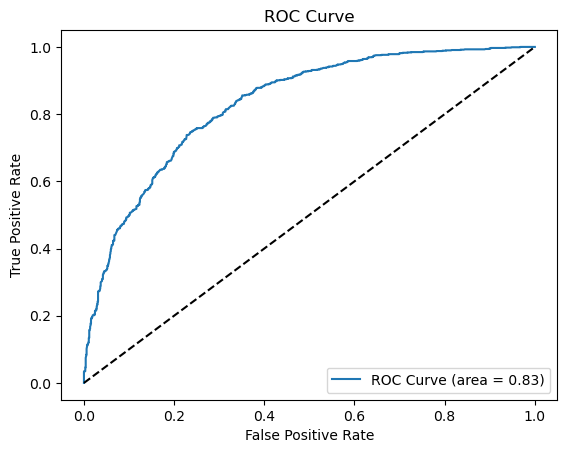

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(Y_test,y_pred)}")

print(classification_report(Y_test,y_pred))

auc_score = roc_auc_score(Y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Regresion logistica sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'penalty': ['l1', 'l2','elasticnet',None],  # L1 y L2 son los tipos de regularización
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # C es el inverso de la fuerza de regularización
    'solver':['lbfgs','sag','saga']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train, Y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
best_model_lr = grid_search.best_estimator_
y_pred_probs = best_model_lr.predict(test)
y_pred = (y_pred_probs >= 0.5).astype(int)

C:\Users\sweet\anaconda3\envs\NN\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sweet\anaconda3\envs\NN\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sweet\anaconda3\envs\NN\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sweet\anaconda3\envs\NN\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sweet\anaconda3\envs\NN\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sweet\anaconda3\envs\NN\lib\site-packages\sklearn\linear_model\_logisti

Mejores hiperparámetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


Accuracy: 0.7505
Matthews Score: 0.5048493397949505
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1023
           1       0.72      0.80      0.76       977

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

AUC Score: 0.7515990959217426


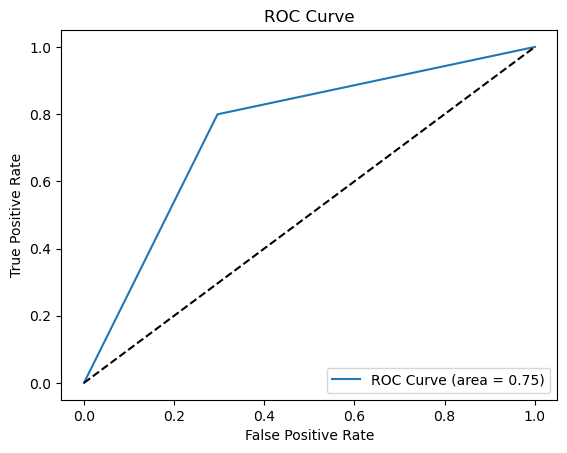

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(Y_test,y_pred)}")

print(classification_report(Y_test,y_pred))

auc_score = roc_auc_score(Y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar el modelo KNN
knn = KNeighborsClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los puntos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métrica de distancia
}

# Configurar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train, Y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
best_model_knn = grid_search.best_estimator_
y_pred_probs = best_model_knn.predict(test)
y_pred = (y_pred_probs >= 0.5).astype(int)

Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


Accuracy: 0.7365
Matthews Score: 0.476870421128744
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1023
           1       0.71      0.79      0.74       977

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

AUC Score: 0.7376146981753348


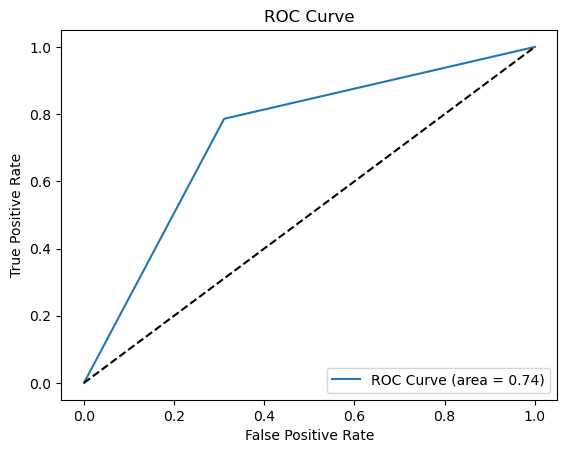

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(Y_test,y_pred)}")

print(classification_report(Y_test,y_pred))

auc_score = roc_auc_score(Y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Instanciar el modelo AdaBoost con un clasificador base de árbol de decisión
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de estimadores
    'learning_rate': [0.01, 0.1, 1],  # Tasa de aprendizaje
    'estimator__max_depth': [1, 2, 3]  # Profundidad máxima para el clasificador base
}

# Configurar GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train, Y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
best_model_ab = grid_search.best_estimator_
y_pred_probs = best_model_ab.predict(test)
y_pred = (y_pred_probs >= 0.5).astype(int)

Mejores hiperparámetros: {'estimator__max_depth': 1, 'learning_rate': 1, 'n_estimators': 100}


Accuracy: 0.758
Matthews Score: 0.5205320314090843
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1023
           1       0.73      0.81      0.77       977

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

AUC Score: 0.7592066203021398


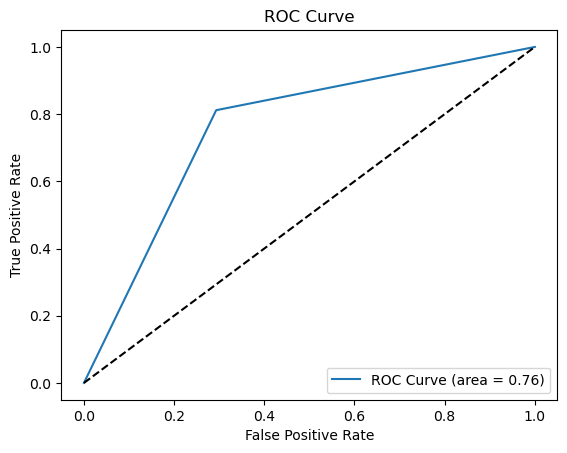

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(Y_test,y_pred)}")

print(classification_report(Y_test,y_pred))

auc_score = roc_auc_score(Y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'learning_rate': [0.01, 0.1, 0.5],  # Tasa de aprendizaje
    'max_depth': [3, 4, 5],  # Profundidad máxima de los árboles
    'min_child_weight': [1, 5, 10],  # Peso mínimo de los hijos requerido para hacer una partición
    'gamma': [0.5, 1, 1.5],  # Parámetro de regularización
    'subsample': [0.6, 0.8, 1.0],  # Porcentaje de muestras usadas para cada árbol
    'colsample_bytree': [0.6, 0.8, 1.0]  # Porcentaje de características usadas para cada árbol
}

# Configurar GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train, Y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
best_model_xgb = grid_search.best_estimator_

y_pred_probs = best_model_xgb.predict(test)
y_pred = (y_pred_probs >= 0.5).astype(int)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Mejores hiperparámetros: {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}


Accuracy: 0.758
Matthews Score: 0.5206769945134622
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1023
           1       0.73      0.81      0.77       977

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

AUC Score: 0.7592296324755797


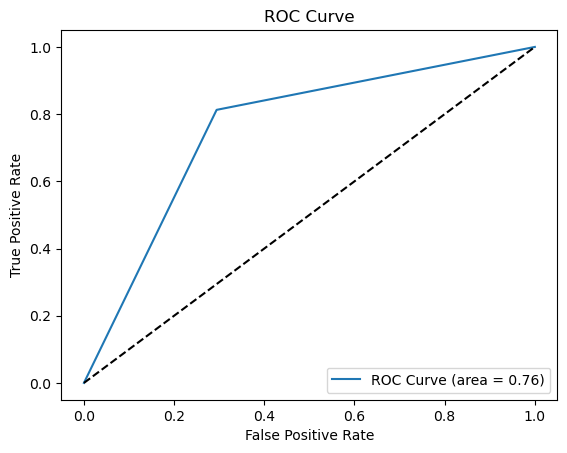

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(Y_test,y_pred)}")

print(classification_report(Y_test,y_pred))

auc_score = roc_auc_score(Y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
    'bootstrap': [True, False]  # Método para muestrear conjuntos de datos
}

# Configurar GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train, Y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
best_model_rf = grid_search.best_estimator_

y_pred_probs = best_model_rf.predict(test)
y_pred = (y_pred_probs >= 0.5).astype(int)

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


Accuracy: 0.7485
Matthews Score: 0.5027128472143207
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1023
           1       0.71      0.81      0.76       977

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

AUC Score: 0.7498971956164812


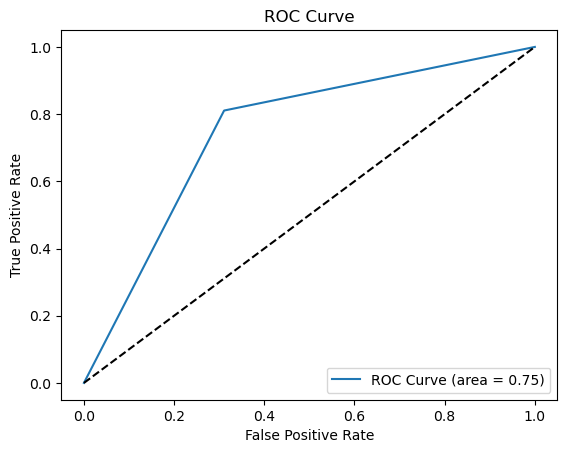

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(Y_test,y_pred)}")

print(classification_report(Y_test,y_pred))

auc_score = roc_auc_score(Y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(train, Y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
best_model_nb = grid_search.best_estimator_
y_pred_probs = best_model_nb.predict(test)
y_pred = (y_pred_probs >= 0.5).astype(int)

Mejores hiperparámetros: {'var_smoothing': 1e-09}


In [ ]:
Y = Y_test  # Valores verdaderos
Y_hat = best_model  # Predicciones del modelo

# Error cuadrático medio (MSE)
mse = np.mean((Y - Y_hat)**2)

error = Y - Y_hat
var_error = np.var(error)

# El error reducible es el MSE menos la varianza del error (nuestro proxy para el error irreducible)
reducible_error = mse - var_error

# Imprimir los errores
(reducible_error, var_error)

Accuracy: 0.7475
Matthews Score: 0.5068659477507371
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      1023
           1       0.70      0.84      0.77       977

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000

AUC Score: 0.749633055886564


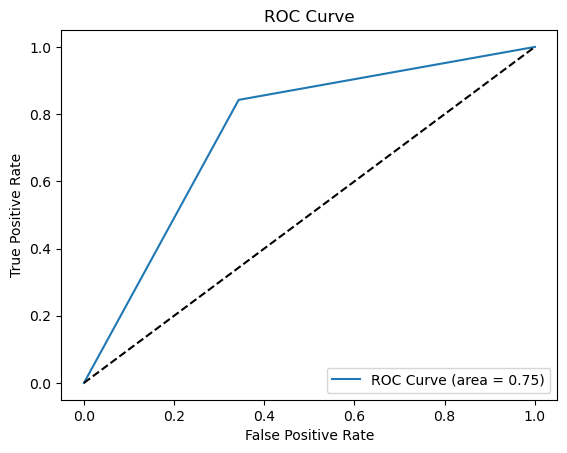

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(Y_test,y_pred)}")

print(classification_report(Y_test,y_pred))

auc_score = roc_auc_score(Y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Redes neuronales

In [ ]:
import optuna
from time import perf_counter
import tensorflow as tf
from tensorflow import keras
# Define el modelo dentro de una función que tomará los hiperparámetros como argumentos
def create_model(activation_1, activation_2, activation_3, activation_4, init_mode_1, init_mode_2, init_mode_3, init_mode_4, regularizer_type):

    if regularizer_type == "l1":
        regularizer = keras.regularizers.l1(0.01)
    elif regularizer_type == "l2":
        regularizer = keras.regularizers.l2(0.01)
    else:
        regularizer = None


    model = keras.Sequential([
        keras.layers.Dense(950, input_shape=(4,), activation=activation_1,
                           kernel_initializer=init_mode_1, kernel_regularizer=regularizer_type),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(950, activation=activation_2, kernel_initializer=init_mode_2),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(950, activation=activation_3, kernel_initializer=init_mode_3),
        keras.layers.Dense(1, activation=activation_4, kernel_initializer=init_mode_4)
    ])
    model.compile(
        optimizer = tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()])
    return model

# Función objetivo para Optuna
def objective(trial):

    regularizer_type = trial.suggest_categorical('regularizer_type', [None, "l1", "l2"])

    activations_list = ["elu","exponential","hard_sigmoid","linear", "relu","selu","sigmoid","softmax","softplus",
                                                                                         "softsign","swish","tanh"]
    activation_1 = trial.suggest_categorical('activation_1', activations_list)
    activation_2 = trial.suggest_categorical('activation_2', activations_list)
    activation_3 = trial.suggest_categorical('activation_3', activations_list)
    activation_4 = trial.suggest_categorical('activation_4', activations_list)

    init_list = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    init_mode_1 = trial.suggest_categorical('init_mode_1', init_list)
    init_mode_2 = trial.suggest_categorical('init_mode_2', init_list)
    init_mode_3 = trial.suggest_categorical('init_mode_3', init_list)
    init_mode_4 = trial.suggest_categorical('init_mode_4', init_list)

    model = create_model(activation_1, activation_2, activation_3, activation_4, init_mode_1, init_mode_2, init_mode_3, init_mode_4, regularizer_type)
    EarlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 25, mode = 'min', restore_best_weights = True)
    history = model.fit(train, Y_train, epochs=150, validation_data=(test, Y_test), verbose=0, callbacks=EarlyStop)

    # Usa la pérdida de validación como métrica para optimizar
    val_loss = history.history['val_loss'][-1]
    return val_loss
start=perf_counter()
# Iniciar la optimización con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:", study.best_params)
tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

[I 2024-02-29 10:49:13,955] A new study created in memory with name: no-name-a0e7824d-b31a-47b8-8036-ac7e5341ff78
[I 2024-02-29 10:50:15,562] Trial 0 finished with value: 7.5399065017700195 and parameters: {'regularizer_type': 'l1', 'activation_1': 'exponential', 'activation_2': 'linear', 'activation_3': 'elu', 'activation_4': 'softsign', 'init_mode_1': 'glorot_normal', 'init_mode_2': 'uniform', 'init_mode_3': 'lecun_uniform', 'init_mode_4': 'zero'}. Best is trial 0 with value: 7.5399065017700195.
[I 2024-02-29 10:50:56,023] Trial 1 finished with value: 7.799985885620117 and parameters: {'regularizer_type': 'l2', 'activation_1': 'softmax', 'activation_2': 'sigmoid', 'activation_3': 'softplus', 'activation_4': 'softplus', 'init_mode_1': 'normal', 'init_mode_2': 'zero', 'init_mode_3': 'he_normal', 'init_mode_4': 'glorot_uniform'}. Best is trial 0 with value: 7.5399065017700195.
[I 2024-02-29 10:51:36,750] Trial 2 finished with value: 7.535088062286377 and parameters: {'regularizer_type':

Mejores hiperparámetros: {'regularizer_type': None, 'activation_1': 'selu', 'activation_2': 'sigmoid', 'activation_3': 'swish', 'activation_4': 'sigmoid', 'init_mode_1': 'normal', 'init_mode_2': 'he_normal', 'init_mode_3': 'he_normal', 'init_mode_4': 'he_uniform'}
Elapsed time: 118.49 min.


In [ ]:
dicc = study.best_params
dicc

{'regularizer_type': None,
 'activation_1': 'selu',
 'activation_2': 'sigmoid',
 'activation_3': 'swish',
 'activation_4': 'sigmoid',
 'init_mode_1': 'normal',
 'init_mode_2': 'he_normal',
 'init_mode_3': 'he_normal',
 'init_mode_4': 'he_uniform'}

In [ ]:
dicc = {'regularizer_type': None,
 'activation_1': 'selu',
 'activation_2': 'sigmoid',
 'activation_3': 'swish',
 'activation_4': 'sigmoid',
 'init_mode_1': 'normal',
 'init_mode_2': 'he_normal',
 'init_mode_3': 'he_normal',
 'init_mode_4': 'he_uniform'}

In [ ]:
import tensorflow as tf
from tensorflow import keras

if dicc['regularizer_type'] == 'None':
    dicc['regularizer_type'] = None

model = tf.keras.Sequential([
    keras.layers.Dense(950, input_shape=(4,), activation = dicc['activation_1'], kernel_initializer=dicc['init_mode_1'], kernel_regularizer=dicc['regularizer_type']),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(950, activation=dicc['activation_2'], kernel_initializer=dicc['init_mode_2']),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(950, activation=dicc['activation_3'], kernel_initializer=dicc['init_mode_3']),
    keras.layers.Dense(1, activation=dicc['activation_4'], kernel_initializer=dicc['init_mode_4']),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.metrics.BinaryAccuracy()]
)
CB = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, mode='min', restore_best_weights=True)
history = model.fit(train, Y_train, validation_data=(test, Y_test), epochs=1000, callbacks=CB)
model.evaluate(test, Y_test)

Epoch 1/1000
563/563 [==============================] - 2s 4ms/step - loss: 0.5632 - binary_accuracy: 0.7222 - val_loss: 0.5128 - val_binary_accuracy: 0.7575
Epoch 2/1000
563/563 [==============================] - 2s 3ms/step - loss: 0.5178 - binary_accuracy: 0.7431 - val_loss: 0.5092 - val_binary_accuracy: 0.7510
Epoch 3/1000
563/563 [==============================] - 2s 3ms/step - loss: 0.5155 - binary_accuracy: 0.7482 - val_loss: 0.5349 - val_binary_accuracy: 0.7365
Epoch 4/1000
563/563 [==============================] - 2s 3ms/step - loss: 0.5137 - binary_accuracy: 0.7458 - val_loss: 0.5050 - val_binary_accuracy: 0.7480
Epoch 5/1000
563/563 [==============================] - 2s 3ms/step - loss: 0.5130 - binary_accuracy: 0.7529 - val_loss: 0.5144 - val_binary_accuracy: 0.7470
Epoch 6/1000
563/563 [==============================] - 2s 3ms/step - loss: 0.5101 - binary_accuracy: 0.7502 - val_loss: 0.5088 - val_binary_accuracy: 0.7485
Epoch 7/1000
563/563 [==============================

[0.49898791313171387, 0.7584999799728394]

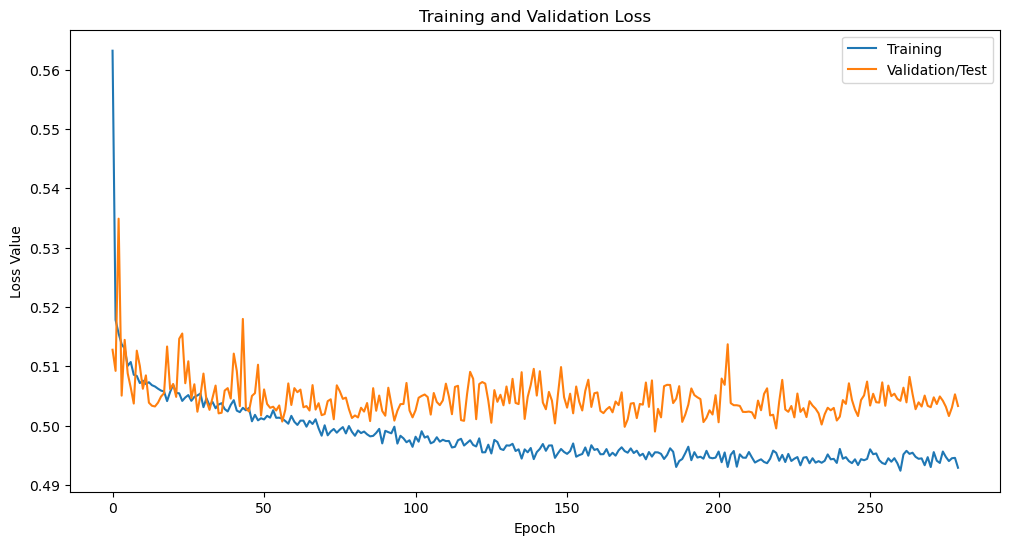

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [ ]:
y_pred_probs = model.predict(test)
y_pred = (y_pred_probs >= 0.5).astype(int)

63/63 [==============================] - 0s 799us/step


Accuracy: 0.7475
Matthews Score: 0.524954002250904
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1023
           1       0.72      0.83      0.77       977

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000

AUC Score: 0.8359006914657854


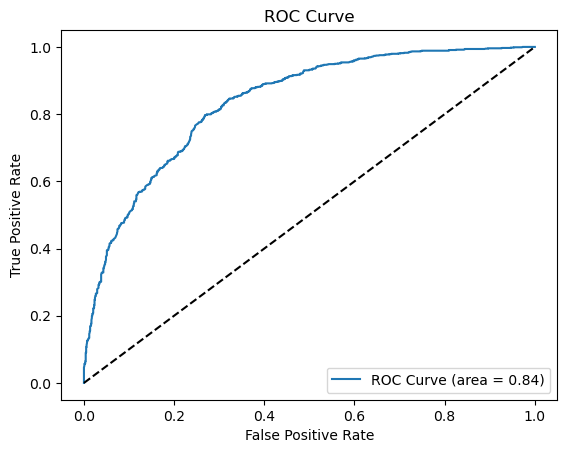

In [ ]:
aaccuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(f"Matthews Score: {sklearn.metrics.matthews_corrcoef(Y_test,y_pred)}")

print(classification_report(Y_test,y_pred))

auc_score = roc_auc_score(Y_test, y_pred_probs)
print(f"AUC Score: {auc_score}")
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

La comparación entre los resultados es clara, la diferencia entre el rendimiento de los modelos antes y despues de una feature selection es considerablemente menor, asi mismo es importante remarcar la limitada capacidad de los algoritmos de encontrar una relación entre las variables objetivo y las features.

**Incluir critica objetiva al instrumento AQUI**

## Comparacion

| Modelo | Accuracy | AUC score | F1 macro | Matthews score |
| --- | --- | --- | --- | --- |
| LogReg sm | 0.7475 | 0.83 | 0.75 | 0.498 |
| LogReg sk | 0.7505 | 0.7515 | 0.75 | 0.5048 |
| KNN | 0.7365 | 0.7376 | 0.74 | 0.4768 |
| AdaBoost | 0.758 | 0.7592 | 0.76 | 0.5205 |
| XGBoost | 0.758 |  0.7592 | 0.76 | 0.5206 |
| Random Forest | 0.7485 | 0.7498 | 0.75 | 0.5027 |
| Naive Bayes | 0.7475 | 0.7496 | 0.75 | 0.5068 |
| Redes Neuronales | 0.7475 | 0.8359 | 0.76 | 0.5249 |

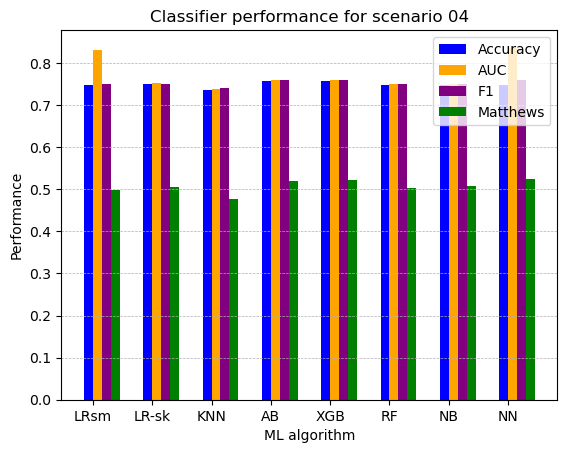

In [4]:
data = {
    'Classifier': ['LRsm', 'LR-sk', 'KNN', 'AB', 'XGB','RF','NB','NN'],
    'Accuracy': [0.7475, 0.7505, 0.7365, 0.758, 0.758, 0.7485, 0.7475, 0.7475],
    'AUC': [0.83, 0.7515, 0.7376, 0.7592, 0.7592, 0.7498, 0.7496, 0.8359],
    'F1': [0.75, 0.75, 0.74, 0.76, 0.76, 0.75, 0.75, 0.76],
    'Matthews': [0.498, 0.5048, 0.4768, 0.5205, 0.5206, 0.5027, 0.5068, 0.5249 ]
}

df = pd.DataFrame(data)

# Configuración de los colores de las barras
colors = ['blue', 'orange', 'purple', 'green', 'red']

# Número de grupos de barras
n_groups = len(df)

# Crear un índice para cada grupo de barras y un ancho de barra
index = np.arange(n_groups)
bar_width = 0.15

# Inicializar la figura y el eje
fig, ax = plt.subplots()

# Crear las barras para cada una de las métricas
for i, metric in enumerate(['Accuracy', 'AUC', 'F1', 'Matthews']):
    ax.bar(index + i*bar_width, df[metric], bar_width, label=metric, color=colors[i])

# Añadir títulos y etiquetas
ax.set_xlabel('ML algorithm')
ax.set_ylabel('Performance')
ax.set_title('Classifier performance for scenario 04')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Classifier'])
ax.legend()

# Mostrar un cuadrícula en el eje y para facilitar la lectura
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()